In [22]:
import tensorflow as tf
import numpy as np
import random
import math
import sys
import json
import os

In [23]:
batch_size = 256
epochs = 100
learning_rate = 0.0004
rnn_unit_size = 100

In [24]:
os.getcwd()

'C:\\Users\\hoone\\OneDrive\\Desktop\\RNN_smlee\\RNN_smlee\\DS2'

In [25]:
#### Changing HERE ######
shoes_course = 'DS2'
tR = 500
no = 1

In [26]:
csv = np.genfromtxt('..\\Data2\\RiMS_' + shoes_course + '_tR' + str(tR) + '.csv', delimiter=',')
csv_cp = np.genfromtxt('..\\Data2\\RiMS_' + shoes_course + '_tR' + str(tR) +'.csv', delimiter=',')
print(csv.shape)
print(csv)

(2441, 5)
[[4.60000000e+01 0.00000000e+00 5.99999990e-02 1.01000000e+01
  1.00000000e-03]
 [4.70000000e+01 0.00000000e+00 1.29999995e-01 1.01000000e+01
  1.00000000e-03]
 [4.70000000e+01 0.00000000e+00 2.70000011e-01 1.01000000e+01
  1.00000000e-03]
 ...
 [3.60000000e+01 0.00000000e+00 1.17999995e+00 1.01000000e+01
  1.00000000e-03]
 [3.60000000e+01 0.00000000e+00 1.05999994e+00 1.01000000e+01
  1.00000000e-03]
 [3.70000000e+01 0.00000000e+00 1.08000004e+00 1.01000000e+01
  1.00000000e-03]]


In [27]:
def check_model_history():
    # https://stackoverflow.com/questions/7100125/storing-python-dictionaries
    with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no )+ '.json', 'r') as model_history_file:
        model_history = json.load(model_history_file)
        print(model_history)


In [12]:
data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

data_input = csv_cp[:train_cutoff, 0:4]
data_output = csv_cp[:train_cutoff, 4]
val_input = csv_cp[train_cutoff:, 0:4]
val_output = csv_cp[train_cutoff:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
csv_in = csv_in.reshape(csv_num, 4, 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')

ValueError: cannot reshape array of size 10000 into shape (25,4,1)

In [13]:
print(csv.shape)

(2441, 5)


In [14]:
print(data_input.shape)

(1953, 4)


In [15]:
predict_input = csv_cp[:]
print(predict_input.shape)

(2441, 5)


In [29]:
data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:train_cutoff, 0:4]
data_output = csv_cp[:train_cutoff, 4]
val_input = csv_cp[train_cutoff:, 0:4]
val_output = csv_cp[train_cutoff:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 100)               10500     
                                                                 
Total params: 10,500
Trainable params: 10,500
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 58ms/step - loss: 0.9300 - mse: 0.9300 - mae: 0.9219 - val_loss: 0.8892 - val_mse: 0.8892 - val_mae: 0.8987
Epoch 2/100
8/8 [==============================] - 0s 35ms/step - loss: 0.8889 - mse: 0.8889 - mae: 0.8909 - val_loss: 0.8475 - val_mse: 0.8475 - val_mae: 0.8654
Epoch 3/100
8/8 [==============================] - 0s 35ms/step - loss: 0.8492 - mse: 0.8492 - mae: 0.8601 - val_loss: 0.8110 - val_mse: 0.8110 - val_mae: 0.8355
Epoch 4/100
8/8 [==============================] - 0s 35ms/step - loss: 0.8116 - mse: 0.8116

Epoch 48/100
8/8 [==============================] - 0s 34ms/step - loss: 0.1387 - mse: 0.1387 - mae: 0.2711 - val_loss: 0.1221 - val_mse: 0.1221 - val_mae: 0.2555
Epoch 49/100
8/8 [==============================] - 0s 32ms/step - loss: 0.1403 - mse: 0.1403 - mae: 0.2747 - val_loss: 0.1341 - val_mse: 0.1341 - val_mae: 0.2747
Epoch 50/100
8/8 [==============================] - 0s 34ms/step - loss: 0.1353 - mse: 0.1353 - mae: 0.2711 - val_loss: 0.1185 - val_mse: 0.1185 - val_mae: 0.2526
Epoch 51/100
8/8 [==============================] - 0s 35ms/step - loss: 0.1286 - mse: 0.1286 - mae: 0.2628 - val_loss: 0.1126 - val_mse: 0.1126 - val_mae: 0.2430
Epoch 52/100
8/8 [==============================] - 0s 35ms/step - loss: 0.1239 - mse: 0.1239 - mae: 0.2559 - val_loss: 0.1093 - val_mse: 0.1093 - val_mae: 0.2384
Epoch 53/100
8/8 [==============================] - 0s 33ms/step - loss: 0.1229 - mse: 0.1229 - mae: 0.2541 - val_loss: 0.1071 - val_mse: 0.1071 - val_mae: 0.2354
Epoch 54/100
8/8 [====

8/8 [==============================] - 0s 32ms/step - loss: 0.0709 - mse: 0.0709 - mae: 0.1814 - val_loss: 0.0621 - val_mse: 0.0621 - val_mae: 0.1701
Epoch 99/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0699 - mse: 0.0699 - mae: 0.1800 - val_loss: 0.0605 - val_mse: 0.0605 - val_mae: 0.1687
Epoch 100/100
8/8 [==============================] - 0s 31ms/step - loss: 0.0694 - mse: 0.0694 - mae: 0.1795 - val_loss: 0.0615 - val_mse: 0.0615 - val_mae: 0.1692


In [32]:
model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 100)               10500     
                                                                 
Total params: 10,500
Trainable params: 10,500
Non-trainable params: 0
_________________________________________________________________
58/58 [==============================] - 0s 5ms/step
Result
[ 0.33894014 -0.0920646   0.37482807 ... -0.19429412 -0.18765596
 -0.00819539]


In [34]:
no = 2

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:train_cutoff, 0:4]
data_output = csv_cp[:train_cutoff, 4]
val_input = csv_cp[train_cutoff:, 0:4]
val_output = csv_cp[train_cutoff:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 100)               10500     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 58ms/step - loss: 0.3161 - mse: 0.3161 - mae: 0.5414 - val_loss: 0.2360 - val_mse: 0.2360 - val_mae: 0.4696
Epoch 2/100
8/8 [==============================] - 0s 35ms/step - loss: 0.1723 - mse: 0.1723 - mae: 0.3913 - val_loss: 0.1100 - val_mse: 0.1100 - val_mae: 0.3152
Epoch 3/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0766 - mse: 0.0766 - mae: 0.2535 - val_loss: 0.0

8/8 [==============================] - 0s 34ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1200 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.1051
Epoch 48/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1207 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1058
Epoch 49/100
8/8 [==============================] - 0s 35ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1206 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.1051
Epoch 50/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1200 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.1046
Epoch 51/100
8/8 [==============================] - 0s 35ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1201 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.1051
Epoch 52/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1200 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.1046
Epoch 53/100
8/8 [=================

8/8 [==============================] - 0s 34ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1197 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1048
Epoch 98/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1193 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1044
Epoch 99/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1193 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1050
Epoch 100/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1196 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.1049


In [35]:
model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 100)               10500     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
58/58 [==============================] - 0s 5ms/step
Result
[0.0994052  0.09845316 0.09916677 ... 0.10080649 0.10080487 0.10071389]


In [36]:
no = 3

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:train_cutoff, 0:4]
data_output = csv_cp[:train_cutoff, 4]
val_input = csv_cp[train_cutoff:, 0:4]
val_output = csv_cp[train_cutoff:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 100)               10500     
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 10,909
Trainable params: 10,909
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 57ms/step - loss: 0.2838 - mse: 0.2838 - mae: 0.5124 - val_loss: 0.2756 - val_mse: 0.2756 - val_mae: 0.5093
Epoch 2/100
8/8 [==============================] - 0s 36ms/step - loss: 0.2456 - mse: 0.2456 - mae: 0.4749 - val_loss: 0.2399 - val_mse: 0.2399 - val_ma

8/8 [==============================] - 0s 36ms/step - loss: 0.1259 - mse: 0.1259 - mae: 0.3322 - val_loss: 0.1334 - val_mse: 0.1334 - val_mae: 0.3500
Epoch 47/100
8/8 [==============================] - 0s 37ms/step - loss: 0.1249 - mse: 0.1249 - mae: 0.3309 - val_loss: 0.1325 - val_mse: 0.1325 - val_mae: 0.3487
Epoch 48/100
8/8 [==============================] - 0s 34ms/step - loss: 0.1241 - mse: 0.1241 - mae: 0.3296 - val_loss: 0.1315 - val_mse: 0.1315 - val_mae: 0.3474
Epoch 49/100
8/8 [==============================] - 0s 38ms/step - loss: 0.1232 - mse: 0.1232 - mae: 0.3283 - val_loss: 0.1306 - val_mse: 0.1306 - val_mae: 0.3460
Epoch 50/100
8/8 [==============================] - 0s 36ms/step - loss: 0.1223 - mse: 0.1223 - mae: 0.3271 - val_loss: 0.1296 - val_mse: 0.1296 - val_mae: 0.3447
Epoch 51/100
8/8 [==============================] - 0s 34ms/step - loss: 0.1214 - mse: 0.1214 - mae: 0.3258 - val_loss: 0.1287 - val_mse: 0.1287 - val_mae: 0.3434
Epoch 52/100
8/8 [=================

8/8 [==============================] - 0s 40ms/step - loss: 0.0890 - mse: 0.0890 - mae: 0.2766 - val_loss: 0.0937 - val_mse: 0.0937 - val_mae: 0.2910
Epoch 97/100
8/8 [==============================] - 0s 40ms/step - loss: 0.0884 - mse: 0.0884 - mae: 0.2757 - val_loss: 0.0931 - val_mse: 0.0931 - val_mae: 0.2900
Epoch 98/100
8/8 [==============================] - 0s 41ms/step - loss: 0.0878 - mse: 0.0878 - mae: 0.2747 - val_loss: 0.0925 - val_mse: 0.0925 - val_mae: 0.2890
Epoch 99/100
8/8 [==============================] - 0s 43ms/step - loss: 0.0872 - mse: 0.0872 - mae: 0.2738 - val_loss: 0.0918 - val_mse: 0.0918 - val_mae: 0.2880
Epoch 100/100
8/8 [==============================] - 0s 40ms/step - loss: 0.0867 - mse: 0.0867 - mae: 0.2729 - val_loss: 0.0912 - val_mse: 0.0912 - val_mae: 0.2870
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 100)   

In [37]:
no = 4

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:train_cutoff, 0:4]
data_output = csv_cp[:train_cutoff, 4]
val_input = csv_cp[train_cutoff:, 0:4]
val_output = csv_cp[train_cutoff:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 100)               10500     
                                                                 
 dense_3 (Dense)             (None, 4)                 404       
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 10,909
Trainable params: 10,909
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 57ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 2/100
8/8 [==============================] - 0s 36ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_ma

8/8 [==============================] - 0s 34ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 47/100
8/8 [==============================] - 0s 35ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 48/100
8/8 [==============================] - 0s 35ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 49/100
8/8 [==============================] - 0s 35ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 50/100
8/8 [==============================] - 0s 33ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 51/100
8/8 [==============================] - 0s 34ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 52/100
8/8 [=================

8/8 [==============================] - 0s 38ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 97/100
8/8 [==============================] - 0s 40ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 98/100
8/8 [==============================] - 0s 41ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 99/100
8/8 [==============================] - 0s 40ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 100/100
8/8 [==============================] - 0s 43ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 100)   

In [38]:
no = 5

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:train_cutoff, 0:4]
data_output = csv_cp[:train_cutoff, 4]
val_input = csv_cp[train_cutoff:, 0:4]
val_output = csv_cp[train_cutoff:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 100)               10500     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 10,603
Trainable params: 10,603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 64ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 2/100
8/8 [==============================] - 0s 37ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_ma

8/8 [==============================] - 0s 37ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 47/100
8/8 [==============================] - 0s 36ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 48/100
8/8 [==============================] - 0s 38ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 49/100
8/8 [==============================] - 0s 40ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 50/100
8/8 [==============================] - 0s 39ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 51/100
8/8 [==============================] - 0s 39ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 52/100
8/8 [=================

8/8 [==============================] - 0s 44ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 97/100
8/8 [==============================] - 0s 43ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 98/100
8/8 [==============================] - 0s 43ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 99/100
8/8 [==============================] - 0s 41ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 100/100
8/8 [==============================] - 0s 43ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 100)   

In [39]:
no = 6

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:train_cutoff, 0:4]
data_output = csv_cp[:train_cutoff, 4]
val_input = csv_cp[train_cutoff:, 0:4]
val_output = csv_cp[train_cutoff:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 100)               10500     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 10,603
Trainable params: 10,603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 59ms/step - loss: 0.2782 - mse: 0.2782 - mae: 0.5073 - val_loss: 0.2941 - val_mse: 0.2941 - val_mae: 0.5269
Epoch 2/100
8/8 [==============================] - 0s 38ms/step - loss: 0.2767 - mse: 0.2767 - mae: 0.5059 - val_loss: 0.2925 - val_mse: 0.2925 - val_ma

8/8 [==============================] - 1s 80ms/step - loss: 0.2139 - mse: 0.2139 - mae: 0.4417 - val_loss: 0.2267 - val_mse: 0.2267 - val_mae: 0.4605
Epoch 47/100
8/8 [==============================] - 1s 79ms/step - loss: 0.2126 - mse: 0.2126 - mae: 0.4403 - val_loss: 0.2253 - val_mse: 0.2253 - val_mae: 0.4590
Epoch 48/100
8/8 [==============================] - 1s 76ms/step - loss: 0.2113 - mse: 0.2113 - mae: 0.4388 - val_loss: 0.2240 - val_mse: 0.2240 - val_mae: 0.4576
Epoch 49/100
8/8 [==============================] - 1s 78ms/step - loss: 0.2100 - mse: 0.2100 - mae: 0.4374 - val_loss: 0.2226 - val_mse: 0.2226 - val_mae: 0.4562
Epoch 50/100
8/8 [==============================] - 1s 75ms/step - loss: 0.2087 - mse: 0.2087 - mae: 0.4360 - val_loss: 0.2212 - val_mse: 0.2212 - val_mae: 0.4547
Epoch 51/100
8/8 [==============================] - 1s 67ms/step - loss: 0.2074 - mse: 0.2074 - mae: 0.4346 - val_loss: 0.2199 - val_mse: 0.2199 - val_mae: 0.4533
Epoch 52/100
8/8 [=================

8/8 [==============================] - 0s 41ms/step - loss: 0.1560 - mse: 0.1560 - mae: 0.3732 - val_loss: 0.1656 - val_mse: 0.1656 - val_mae: 0.3916
Epoch 97/100
8/8 [==============================] - 0s 42ms/step - loss: 0.1550 - mse: 0.1550 - mae: 0.3719 - val_loss: 0.1646 - val_mse: 0.1646 - val_mae: 0.3904
Epoch 98/100
8/8 [==============================] - 0s 40ms/step - loss: 0.1540 - mse: 0.1540 - mae: 0.3706 - val_loss: 0.1635 - val_mse: 0.1635 - val_mae: 0.3891
Epoch 99/100
8/8 [==============================] - 0s 41ms/step - loss: 0.1531 - mse: 0.1531 - mae: 0.3693 - val_loss: 0.1625 - val_mse: 0.1625 - val_mae: 0.3878
Epoch 100/100
8/8 [==============================] - 0s 40ms/step - loss: 0.1521 - mse: 0.1521 - mae: 0.3681 - val_loss: 0.1615 - val_mse: 0.1615 - val_mae: 0.3865
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 100)   

In [40]:
no = 6

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:train_cutoff, 0:4]
data_output = csv_cp[:train_cutoff, 4]
val_input = csv_cp[train_cutoff:, 0:4]
val_output = csv_cp[train_cutoff:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 100)               10500     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 57ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 2/100
8/8 [==============================] - 0s 35ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 3/100
8/8 [==============================] - 0s 35ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8

8/8 [==============================] - 0s 36ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 48/100
8/8 [==============================] - 0s 35ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 49/100
8/8 [==============================] - 0s 35ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 50/100
8/8 [==============================] - 0s 36ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 51/100
8/8 [==============================] - 0s 36ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 52/100
8/8 [==============================] - 0s 36ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 53/100
8/8 [=================

KeyboardInterrupt: 

In [41]:
del model
no = 7

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:train_cutoff, 0:4]
data_output = csv_cp[:train_cutoff, 4]
val_input = csv_cp[train_cutoff:, 0:4]
val_output = csv_cp[train_cutoff:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 68ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 2/100
8/8 [==============================] - 0s 47ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 3/100
8/8 [==============================] - 0s 47ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.

8/8 [==============================] - 0s 45ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 48/100
8/8 [==============================] - 0s 46ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 49/100
8/8 [==============================] - 0s 48ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 50/100
8/8 [==============================] - 0s 48ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 51/100
8/8 [==============================] - 0s 49ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 52/100
8/8 [==============================] - 0s 48ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 53/100
8/8 [=================

8/8 [==============================] - 0s 47ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 98/100
8/8 [==============================] - 0s 48ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 99/100
8/8 [==============================] - 0s 48ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 100/100
8/8 [==============================] - 0s 48ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
       

In [42]:
del model
no = 8

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:train_cutoff, 0:4]
data_output = csv_cp[:train_cutoff, 4]
val_input = csv_cp[train_cutoff:, 0:4]
val_output = csv_cp[train_cutoff:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 68ms/step - loss: 0.0278 - mse: 0.0278 - mae: 0.1294 - val_loss: 0.0174 - val_mse: 0.0174 - val_mae: 0.0964
Epoch 2/100
8/8 [==============================] - 0s 42ms/step - loss: 0.0264 - mse: 0.0264 - mae: 0.1154 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.0958
Epoch 3/100
8/8 [==============================] - 0s 46ms/step - loss: 0.0258 - mse: 0.0258 - mae: 0.1176 - val_loss: 0.

8/8 [==============================] - 1s 75ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1171 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.1063
Epoch 48/100
8/8 [==============================] - 1s 78ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1145 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.1055
Epoch 49/100
8/8 [==============================] - 1s 76ms/step - loss: 0.0236 - mse: 0.0236 - mae: 0.1152 - val_loss: 0.0203 - val_mse: 0.0203 - val_mae: 0.1094
Epoch 50/100
8/8 [==============================] - 1s 76ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.1139 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1234
Epoch 51/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1132 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.0981
Epoch 52/100
8/8 [==============================] - 1s 73ms/step - loss: 0.0249 - mse: 0.0249 - mae: 0.1222 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.1086
Epoch 53/100
8/8 [=================

8/8 [==============================] - 1s 74ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1161 - val_loss: 0.0198 - val_mse: 0.0198 - val_mae: 0.1083
Epoch 98/100
8/8 [==============================] - 1s 76ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1165 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.1072
Epoch 99/100
8/8 [==============================] - 1s 79ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1168 - val_loss: 0.0191 - val_mse: 0.0191 - val_mae: 0.1041
Epoch 100/100
8/8 [==============================] - 1s 75ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1164 - val_loss: 0.0191 - val_mse: 0.0191 - val_mae: 0.1033
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
       

In [47]:
!pip install matplotlib

  Using cached Pillow-9.1.1-cp37-cp37m-win_amd64.whl (3.3 MB)


In [50]:
import matplotlib.pyplot as plt

0.078597
0.077466
0.075324
0.073670
0.072362
0.071620
0.071222
0.071540
0.071086
0.070531
0.069076
0.070206
0.070934
0.070218
0.076062
0.081877
0.084196
0.082664
0.084223
0.084579
0.084399
0.084295
0.084196
0.091765
0.085019
0.077249
0.080597
0.082721
0.084990
0.093332
0.094996
0.093529
0.092205
0.088526
0.089119
0.091379
0.093812
0.094259
0.088824
0.082846
0.082088
0.082691
0.085291
0.085384
0.092434
0.098601
0.098946
0.098599
0.098499
0.098008
0.099706
0.099959
0.100825
0.100517
0.101121
0.092644
0.084488
0.088284
0.095917
0.110624
0.122349
0.137062
0.158576
0.171770
0.162895
0.150427
0.137269
0.100498
0.085571
0.091225
0.100560
0.115708
0.128587
0.149049
0.152044
0.118535
0.101804
0.092360
0.088475
0.085270
0.082358
0.081389
0.080877
0.076684
0.068234
0.072784
0.079592
0.083348
0.089376
0.096708
0.096146
0.101588
0.097371
0.084747
0.085872
0.090555
0.146492
0.122242
0.114615
0.108658
0.106753
0.105528
0.105420
0.105704
0.105472
0.104940
0.104974
0.106065
0.107452
0.105874
0.105725
0

<function matplotlib.pyplot.show(close=None, block=None)>

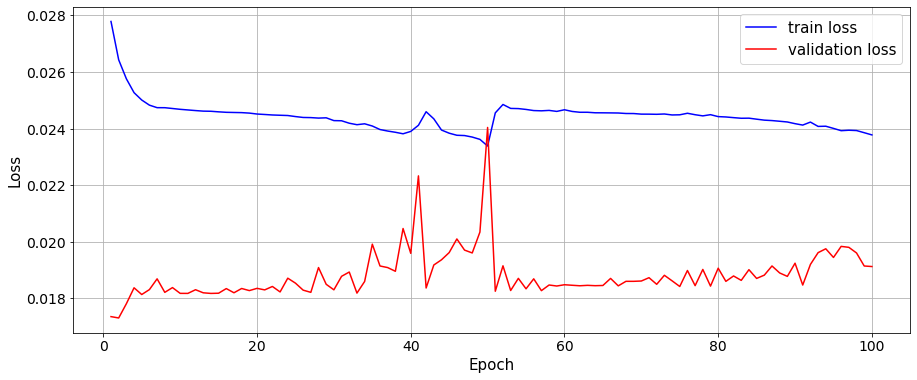

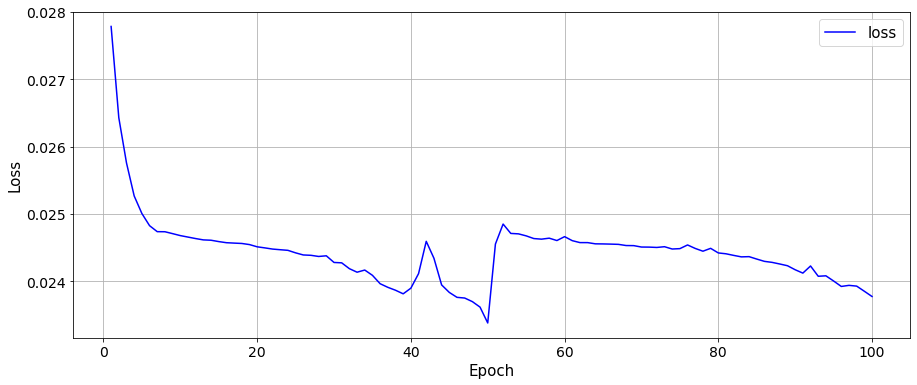

In [51]:
# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 10,603
Trainable params: 10,603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


C:\Users\hoone\anaconda3\envs\py37np1193\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 77ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 2/100
8/8 [==============================] - 0s 54ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 3/100
8/8 [==============================] - 0s 54ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 4/100
8/8 [==============================] - 0s 55ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 5/100
8/8 [==============================] - 0s 53ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 6/100
8/8 [==============================] - 0s 54ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 7/100
8/8 [=======================

8/8 [==============================] - 0s 52ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 52/100
8/8 [==============================] - 0s 53ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 53/100
8/8 [==============================] - 0s 53ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 54/100
8/8 [==============================] - 0s 53ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 55/100
8/8 [==============================] - 0s 52ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 56/100
8/8 [==============================] - 0s 53ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.8909 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.9143
Epoch 57/100
8/8 [=================

 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 10,603
Trainable params: 10,603
Non-trainable params: 0
_________________________________________________________________
58/58 [==============================] - 0s 5ms/step
Result
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

<function matplotlib.pyplot.show(close=None, block=None)>

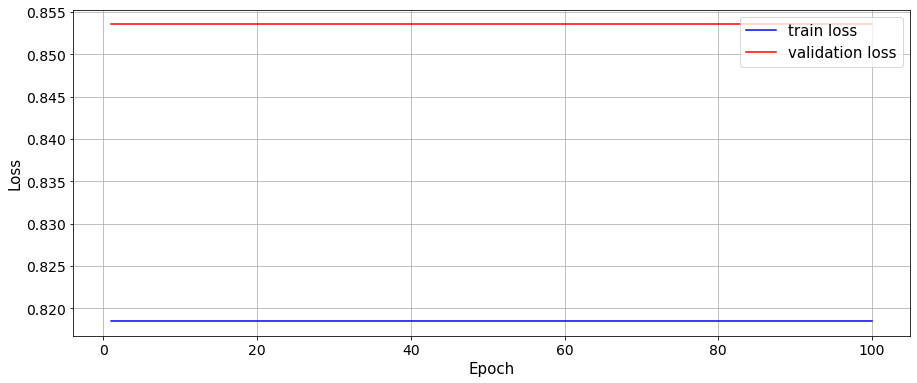

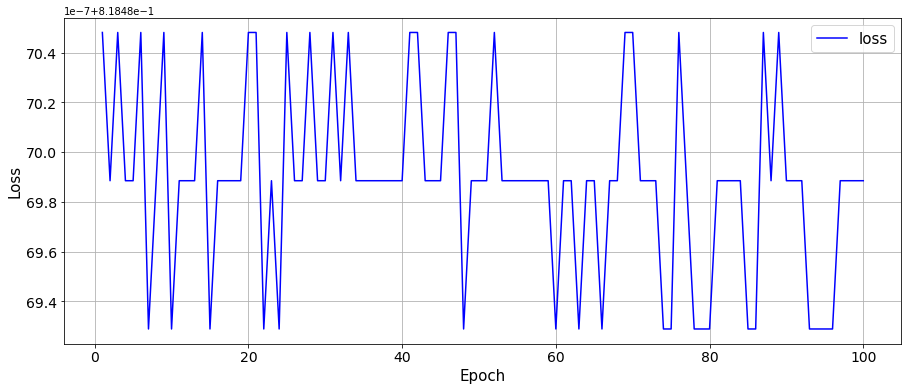

In [52]:
del model
no = 9

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:train_cutoff, 0:4]
data_output = csv_cp[:train_cutoff, 4]
val_input = csv_cp[train_cutoff:, 0:4]
val_output = csv_cp[train_cutoff:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 81ms/step - loss: 0.3257 - mse: 0.3257 - mae: 0.5461 - val_loss: 0.1702 - val_mse: 0.1702 - val_mae: 0.3899
Epoch 2/100
10/10 [==============================] - 1s 61ms/step - loss: 0.1038 - mse: 0.1038 - mae: 0.2947 - val_loss: 0.0440 - val_mse: 0.0440 - val_mae: 0.1898
Epoch 3/100
10/10 [==============================] - 1s 61ms/step - loss: 0.0324 - mse: 0.0324 - mae: 0.1557 - val_lo

10/10 [==============================] - 1s 60ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1185 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1178
Epoch 47/100
10/10 [==============================] - 1s 61ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1175 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1171
Epoch 48/100
10/10 [==============================] - 1s 62ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1174 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1177
Epoch 49/100
10/10 [==============================] - 1s 59ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1177 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1176
Epoch 50/100
10/10 [==============================] - 1s 59ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1173 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1172
Epoch 51/100
10/10 [==============================] - 1s 61ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1174 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1178
Epoch 52/100
10/10 [===

Epoch 96/100
10/10 [==============================] - 1s 66ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1167 - val_loss: 0.0238 - val_mse: 0.0238 - val_mae: 0.1158
Epoch 97/100
10/10 [==============================] - 1s 63ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1161 - val_loss: 0.0238 - val_mse: 0.0238 - val_mae: 0.1171
Epoch 98/100
10/10 [==============================] - 1s 60ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1168 - val_loss: 0.0238 - val_mse: 0.0238 - val_mae: 0.1161
Epoch 99/100
10/10 [==============================] - 1s 61ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1160 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.1166
Epoch 100/100
10/10 [==============================] - 1s 62ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1164 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.1161
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (Sim

<function matplotlib.pyplot.show(close=None, block=None)>

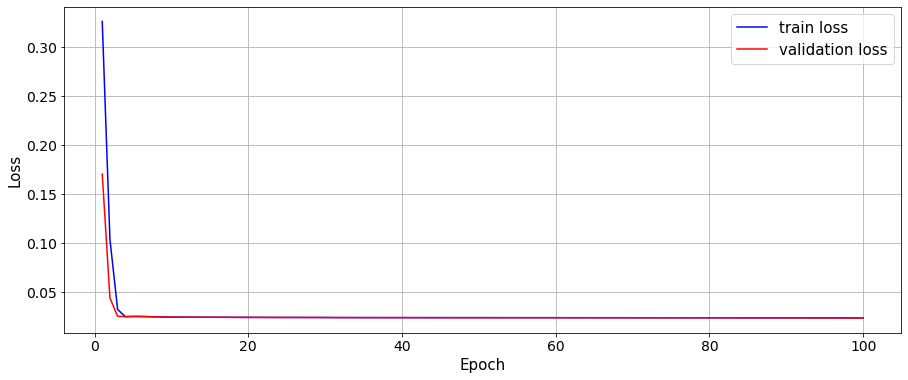

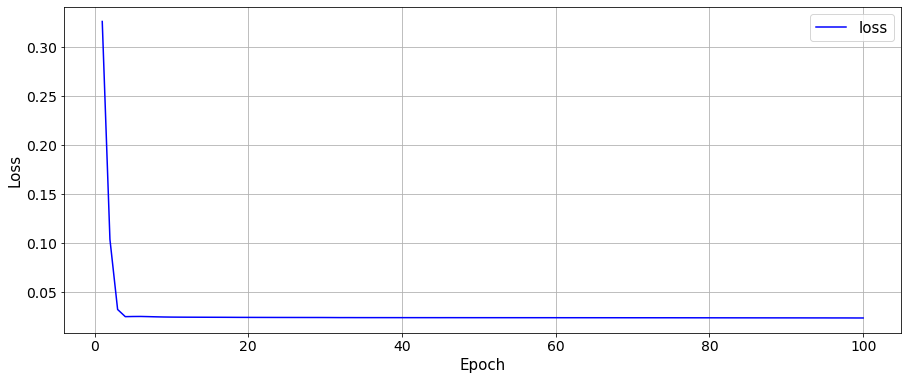

In [54]:
del model
no = 10

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
# data_input = csv_cp[:train_cutoff, 0:4]
# data_output = csv_cp[:train_cutoff, 4]
data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]
# val_input = csv_cp[train_cutoff:, 0:4]
# val_output = csv_cp[train_cutoff:, 4]
val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

In [55]:
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

0.097991
0.089444
0.088575
0.088450
0.089711
0.088678
0.089674
0.089283
0.089771
0.088238
0.091450
0.090121
0.092357
0.092569
0.105339
0.097370
0.096566
0.097753
0.098605
0.098593
0.098452
0.098415
0.098374
0.104617
0.090379
0.100573
0.101056
0.105323
0.108443
0.119028
0.105524
0.105030
0.104508
0.104978
0.105892
0.108952
0.109922
0.109257
0.098593
0.103220
0.108989
0.109238
0.110425
0.109960
0.121492
0.114792
0.113182
0.112912
0.113094
0.116071
0.116172
0.116219
0.116604
0.116401
0.116660
0.101365
0.113249
0.121745
0.130797
0.130581
0.130325
0.136330
0.141799
0.125188
0.121815
0.120699
0.120426
0.102816
0.107895
0.108531
0.109739
0.116266
0.110331
0.135433
0.114856
0.111660
0.111925
0.112011
0.112260
0.109442
0.108522
0.108318
0.108177
0.095373
0.101427
0.104088
0.102083
0.103349
0.104001
0.102688
0.109654
0.105287
0.097625
0.100883
0.103403
0.100824
0.108921
0.098826
0.098692
0.098607
0.098841
0.098737
0.098902
0.099137
0.099085
0.098861
0.098879
0.099424
0.100183
0.099385
0.099396
0

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 100)               10500     
                                                                 
Total params: 10,500
Trainable params: 10,500
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 87ms/step - loss: 0.8597 - mse: 0.8597 - mae: 0.8797 - val_loss: 0.8239 - val_mse: 0.8239 - val_mae: 0.8496
Epoch 2/100
10/10 [==============================] - 1s 71ms/step - loss: 0.8020 - mse: 0.8020 - mae: 0.8321 - val_loss: 0.7709 - val_mse: 0.7709 - val_mae: 0.8069
Epoch 3/100
10/10 [==============================] - 1s 68ms/step - loss: 0.7504 - mse: 0.7504 - mae: 0.7908 - val_loss: 0.7206 - val_mse: 0.7206 - val_mae: 0.7687
Epoch 4/100
10/10 [==============================] - 1s 72ms/step - loss: 0.6984 - ms

10/10 [==============================] - 1s 66ms/step - loss: 0.0605 - mse: 0.0605 - mae: 0.1750 - val_loss: 0.0600 - val_mse: 0.0600 - val_mae: 0.1735
Epoch 48/100
10/10 [==============================] - 1s 67ms/step - loss: 0.0598 - mse: 0.0598 - mae: 0.1733 - val_loss: 0.0593 - val_mse: 0.0593 - val_mae: 0.1725
Epoch 49/100
10/10 [==============================] - 1s 69ms/step - loss: 0.0591 - mse: 0.0591 - mae: 0.1722 - val_loss: 0.0586 - val_mse: 0.0586 - val_mae: 0.1710
Epoch 50/100
10/10 [==============================] - 1s 69ms/step - loss: 0.0585 - mse: 0.0585 - mae: 0.1707 - val_loss: 0.0580 - val_mse: 0.0580 - val_mae: 0.1699
Epoch 51/100
10/10 [==============================] - 1s 71ms/step - loss: 0.0578 - mse: 0.0578 - mae: 0.1692 - val_loss: 0.0575 - val_mse: 0.0575 - val_mae: 0.1686
Epoch 52/100
10/10 [==============================] - 1s 72ms/step - loss: 0.0573 - mse: 0.0573 - mae: 0.1682 - val_loss: 0.0570 - val_mse: 0.0570 - val_mae: 0.1679
Epoch 53/100
10/10 [===

10/10 [==============================] - 1s 112ms/step - loss: 0.0327 - mse: 0.0327 - mae: 0.1336 - val_loss: 0.0328 - val_mse: 0.0328 - val_mae: 0.1330
Epoch 97/100
10/10 [==============================] - 1s 114ms/step - loss: 0.0327 - mse: 0.0327 - mae: 0.1337 - val_loss: 0.0324 - val_mse: 0.0324 - val_mae: 0.1323
Epoch 98/100
10/10 [==============================] - 1s 103ms/step - loss: 0.0324 - mse: 0.0324 - mae: 0.1329 - val_loss: 0.0323 - val_mse: 0.0323 - val_mae: 0.1323
Epoch 99/100
10/10 [==============================] - 1s 107ms/step - loss: 0.0324 - mse: 0.0324 - mae: 0.1328 - val_loss: 0.0320 - val_mse: 0.0320 - val_mae: 0.1321
Epoch 100/100
10/10 [==============================] - 1s 107ms/step - loss: 0.0321 - mse: 0.0321 - mae: 0.1322 - val_loss: 0.0322 - val_mse: 0.0322 - val_mae: 0.1334
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN) 

<function matplotlib.pyplot.show(close=None, block=None)>

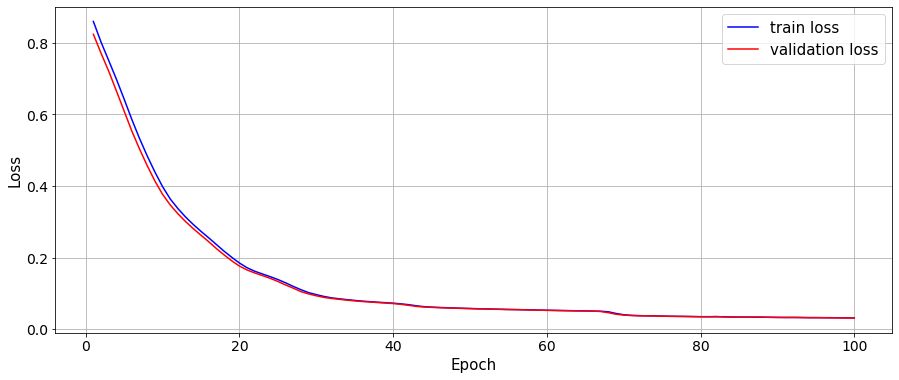

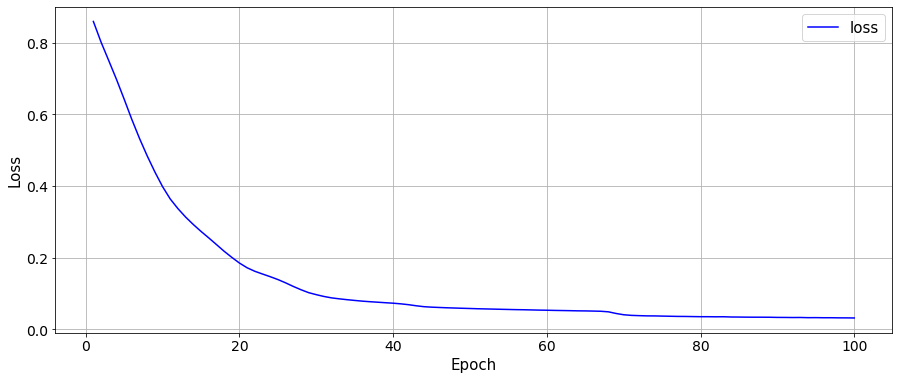

In [59]:

no = 11

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_16 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 100ms/step - loss: 0.0765 - mse: 0.0765 - mae: 0.2532 - val_loss: 0.0401 - val_mse: 0.0401 - val_mae: 0.1817
Epoch 2/100
10/10 [==============================] - 1s 88ms/step - loss: 0.0319 - mse: 0.0319 - mae: 0.1562 - val_loss: 0.0259 - val_mse: 0.0259 - val_mae: 0.1317
Epoch 3/100
10/10 [==============================] - 1s 87ms/step - loss: 0.0250 - mse: 0.0250 - mae: 0.1238 - val_l

10/10 [==============================] - 1s 94ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1181 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1180
Epoch 47/100
10/10 [==============================] - 1s 97ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1176 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1170
Epoch 48/100
10/10 [==============================] - 1s 97ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1171 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1170
Epoch 49/100
10/10 [==============================] - 1s 98ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1166 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1167
Epoch 50/100
10/10 [==============================] - 1s 100ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1167 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1173
Epoch 51/100
10/10 [==============================] - 1s 104ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1175 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1176
Epoch 52/100
10/10 [=

10/10 [==============================] - 2s 159ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1143 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.1128
Epoch 96/100
10/10 [==============================] - 1s 129ms/step - loss: 0.0243 - mse: 0.0243 - mae: 0.1164 - val_loss: 0.0243 - val_mse: 0.0243 - val_mae: 0.1212
Epoch 97/100
10/10 [==============================] - 1s 119ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1191 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1158
Epoch 98/100
10/10 [==============================] - 1s 118ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1164 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1182
Epoch 99/100
10/10 [==============================] - 1s 116ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1185 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.1169
Epoch 100/100
10/10 [==============================] - 1s 111ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1165 - val_loss: 0.0233 - val_mse: 0.0233 - val_mae: 0.1169
Model: "sequenti

<function matplotlib.pyplot.show(close=None, block=None)>

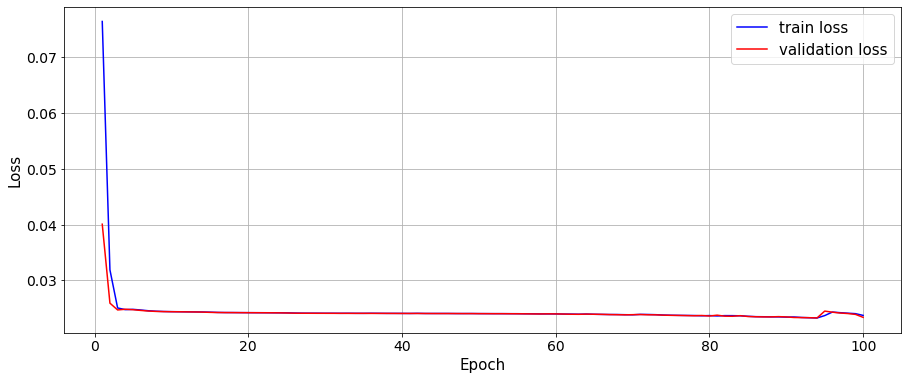

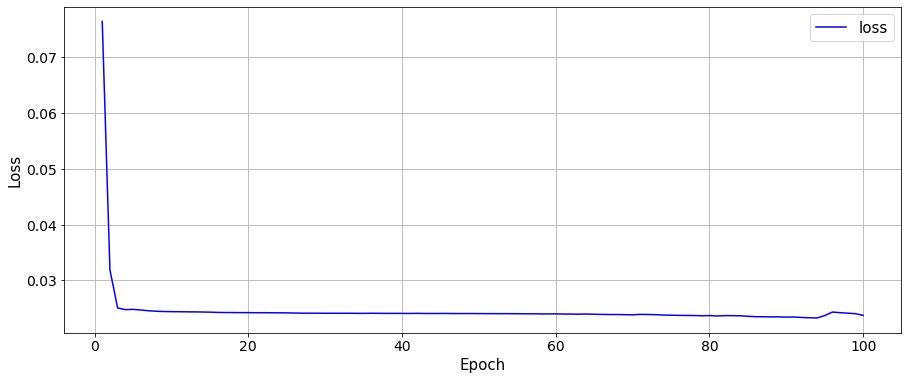

In [60]:

no = 12

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 2s 102ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 2/100
10/10 [==============================] - 1s 84ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 3/100
10/10 [==============================] - 1s 81ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_l

10/10 [==============================] - 1s 81ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 47/100
10/10 [==============================] - 1s 81ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 48/100
10/10 [==============================] - 1s 81ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 49/100
10/10 [==============================] - 1s 86ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 50/100
10/10 [==============================] - 1s 83ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 51/100
10/10 [==============================] - 1s 82ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 52/100
10/10 [===

Epoch 96/100
10/10 [==============================] - 1s 96ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 97/100
10/10 [==============================] - 1s 98ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 98/100
10/10 [==============================] - 1s 101ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 99/100
10/10 [==============================] - 1s 102ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 100/100
10/10 [==============================] - 1s 106ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (

<function matplotlib.pyplot.show(close=None, block=None)>

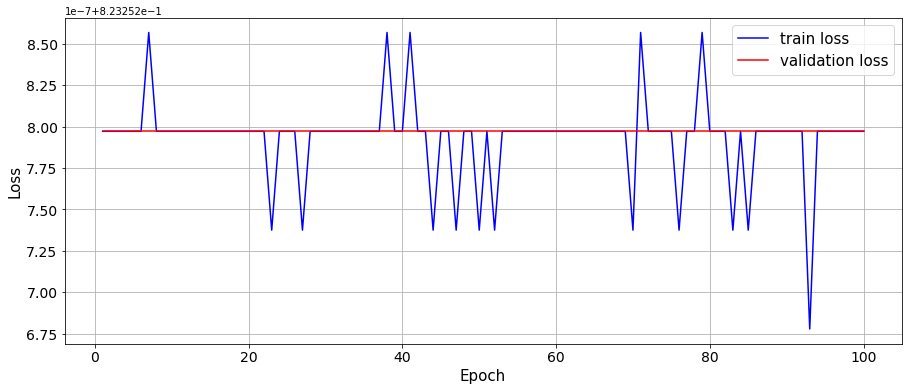

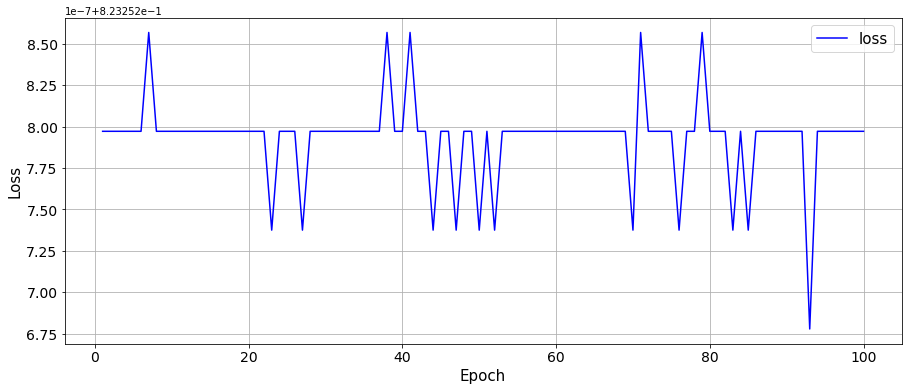

In [62]:

no = 14

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_21 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 88ms/step - loss: 0.1014 - mse: 0.1014 - mae: 0.2919 - val_loss: 0.0418 - val_mse: 0.0418 - val_mae: 0.1860
Epoch 2/100
10/10 [==============================] - 1s 70ms/step - loss: 0.0314 - mse: 0.0314 - mae: 0.1542 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1266
Epoch 3/100
10/10 [==============================] - 1s 69ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1197 - val_lo

10/10 [==============================] - 1s 68ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1178 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1180
Epoch 47/100
10/10 [==============================] - 1s 68ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1174 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1170
Epoch 48/100
10/10 [==============================] - 1s 68ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1172 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1174
Epoch 49/100
10/10 [==============================] - 1s 68ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1172 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1173
Epoch 50/100
10/10 [==============================] - 1s 68ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1175 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1174
Epoch 51/100
10/10 [==============================] - 1s 69ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1173 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1173
Epoch 52/100
10/10 [===

Epoch 96/100
10/10 [==============================] - 1s 71ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1179 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1170
Epoch 97/100
10/10 [==============================] - 1s 70ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1172 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1170
Epoch 98/100
10/10 [==============================] - 1s 73ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1168 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1171
Epoch 99/100
10/10 [==============================] - 1s 70ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1173 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1178
Epoch 100/100
10/10 [==============================] - 1s 71ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1175 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1177
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_21 (Sim

<function matplotlib.pyplot.show(close=None, block=None)>

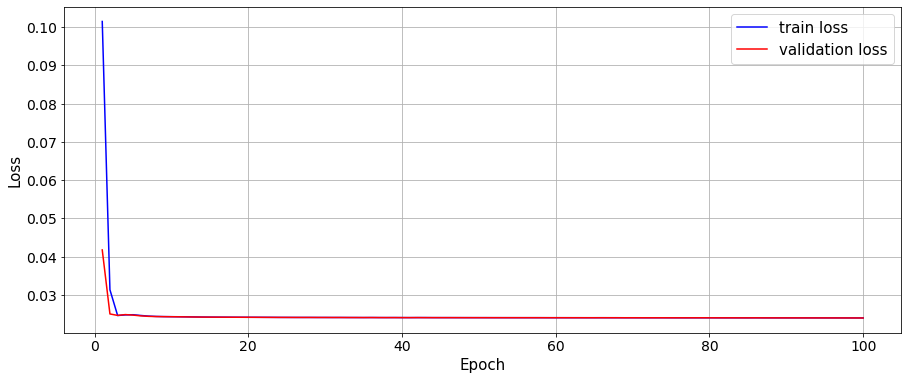

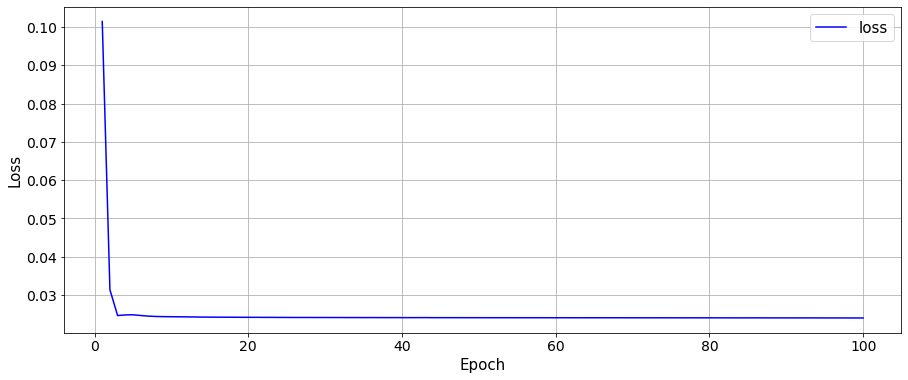

In [65]:

no = 16

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

In [66]:
no = 17

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:train_cutoff, 0:4]
data_output = csv_cp[:train_cutoff, 4]
val_input = csv_cp[train_cutoff:, 0:4]
val_output = csv_cp[train_cutoff:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_22 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_20 (Dense)            (None, 4)                 404       
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
Total params: 10,909
Trainable params: 10,909
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 88ms/step - loss: 0.1318 - mse: 0.1318 - mae: 0.3405 - val_loss: 0.1352 - val_mse: 0.1352 - val_mae: 0.3525
Epoch 2/100
8/8 [==============================] - 1s 67ms/step - loss: 0.1218 - mse: 0.1218 - mae: 0.3262 - val_loss: 0.1177 - val_mse: 0.1177 - val_m

8/8 [==============================] - 1s 70ms/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1801 - val_loss: 0.0380 - val_mse: 0.0380 - val_mae: 0.1806
Epoch 47/100
8/8 [==============================] - 1s 69ms/step - loss: 0.0391 - mse: 0.0391 - mae: 0.1795 - val_loss: 0.0378 - val_mse: 0.0378 - val_mae: 0.1799
Epoch 48/100
8/8 [==============================] - 1s 68ms/step - loss: 0.0389 - mse: 0.0389 - mae: 0.1790 - val_loss: 0.0375 - val_mse: 0.0375 - val_mae: 0.1793
Epoch 49/100
8/8 [==============================] - 1s 68ms/step - loss: 0.0387 - mse: 0.0387 - mae: 0.1785 - val_loss: 0.0373 - val_mse: 0.0373 - val_mae: 0.1787
Epoch 50/100
8/8 [==============================] - 1s 68ms/step - loss: 0.0385 - mse: 0.0385 - mae: 0.1780 - val_loss: 0.0371 - val_mse: 0.0371 - val_mae: 0.1781
Epoch 51/100
8/8 [==============================] - 1s 70ms/step - loss: 0.0383 - mse: 0.0383 - mae: 0.1775 - val_loss: 0.0368 - val_mse: 0.0368 - val_mae: 0.1775
Epoch 52/100
8/8 [=================

8/8 [==============================] - 1s 72ms/step - loss: 0.0319 - mse: 0.0319 - mae: 0.1589 - val_loss: 0.0290 - val_mse: 0.0290 - val_mae: 0.1552
Epoch 97/100
8/8 [==============================] - 1s 72ms/step - loss: 0.0318 - mse: 0.0318 - mae: 0.1585 - val_loss: 0.0289 - val_mse: 0.0289 - val_mae: 0.1548
Epoch 98/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0317 - mse: 0.0317 - mae: 0.1582 - val_loss: 0.0288 - val_mse: 0.0288 - val_mae: 0.1544
Epoch 99/100
8/8 [==============================] - 1s 72ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1579 - val_loss: 0.0287 - val_mse: 0.0287 - val_mae: 0.1539
Epoch 100/100
8/8 [==============================] - 1s 72ms/step - loss: 0.0315 - mse: 0.0315 - mae: 0.1575 - val_loss: 0.0285 - val_mse: 0.0285 - val_mae: 0.1535
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_22 (SimpleRNN)   (None, 100)  

0.190264
0.190265
0.190267
0.190268
0.190266
0.190267
0.190267
0.190267
0.190267
0.190269
0.190266
0.190269
0.190269
0.190269
0.190261
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190266
0.190264
0.190266
0.190267
0.190265
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190262
0.190262
0.190261
0.190261
0.190261
0.190261
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190263
0.190264
0.190264
0.190263
0.190263
0.190264
0.190263
0.190260
0.190260
0.190260
0.190260
0.190260
0.190263
0.190264
0.190264
0.190264
0.190262
0.190263
0.190261
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190260
0.190261
0.190261
0.190266
0.190267
0.190265
0.190266
0.190266
0.190265
0.190267
0.190263
0.190262
0.190265
0.190266
0.190265
0.190267
0.190294
0.190288
0.190293
0.190293
0.190293
0.190293
0.190293
0.190293
0.190293
0.190293
0.190293
0.190293
0.190293
0.190293
0.190293
0

<function matplotlib.pyplot.show(close=None, block=None)>

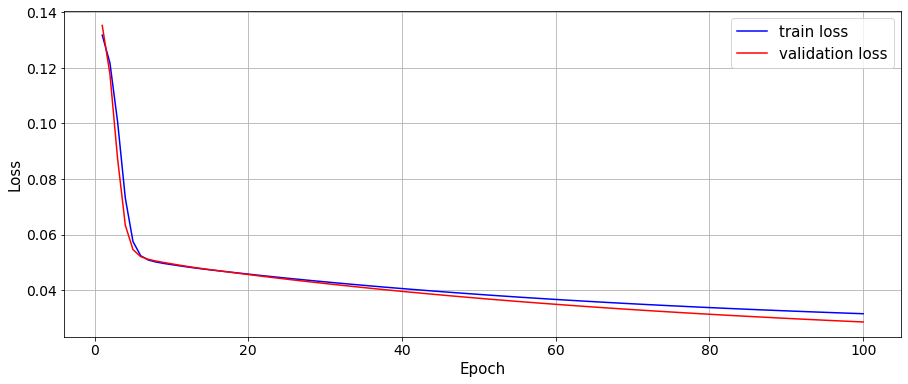

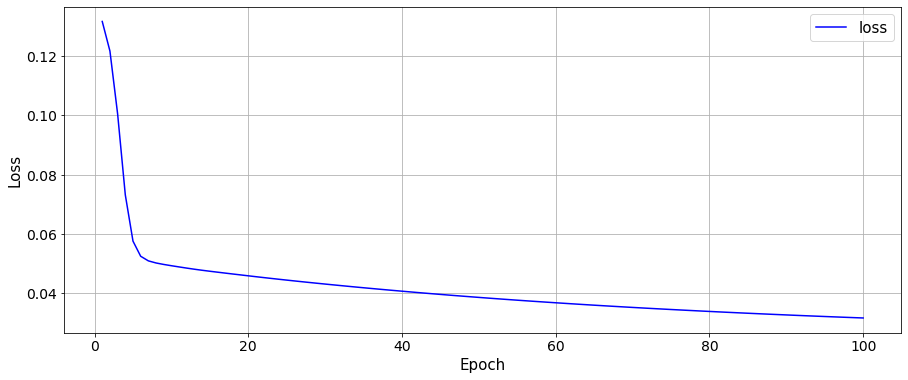

In [67]:
# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_23 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_22 (Dense)            (None, 4)                 404       
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 10,909
Trainable params: 10,909
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 2s 103ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 2/100
10/10 [==============================] - 1s 82ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - 

Epoch 46/100
10/10 [==============================] - 1s 74ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 47/100
10/10 [==============================] - 1s 74ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 48/100
10/10 [==============================] - 1s 79ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 49/100
10/10 [==============================] - 1s 77ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 50/100
10/10 [==============================] - 1s 75ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 51/100
10/10 [==============================] - 1s 76ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 52/1

Epoch 96/100
10/10 [==============================] - 1s 76ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 97/100
10/10 [==============================] - 1s 76ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 98/100
10/10 [==============================] - 1s 77ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 99/100
10/10 [==============================] - 1s 77ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 100/100
10/10 [==============================] - 1s 77ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_23 (Sim

<function matplotlib.pyplot.show(close=None, block=None)>

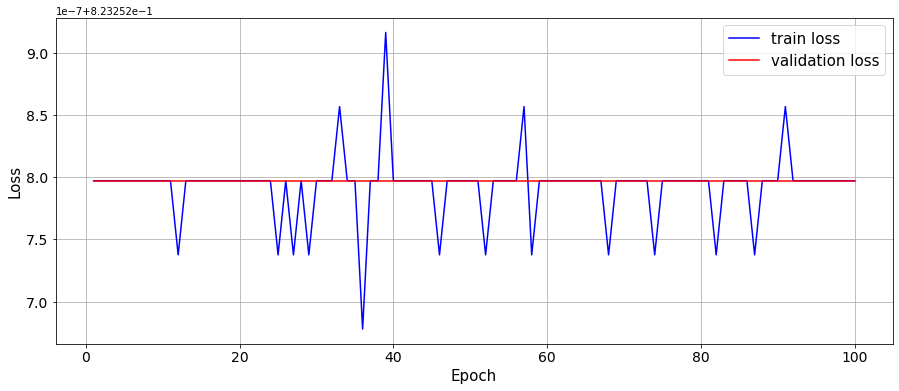

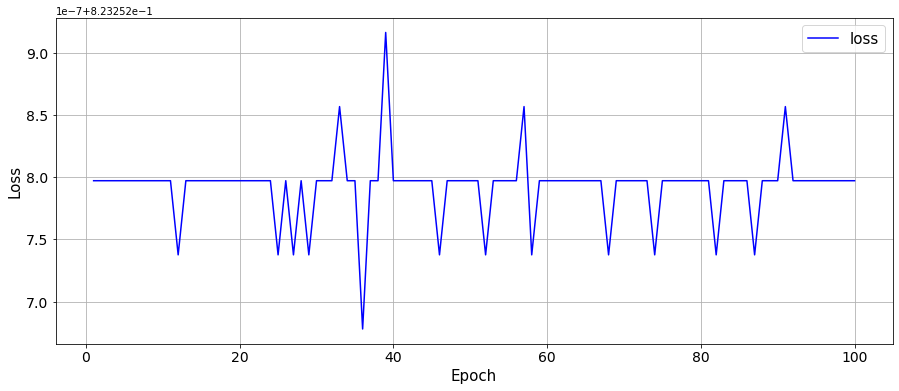

In [68]:
no = 18

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]
val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_24 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_24 (Dense)            (None, 4)                 404       
                                                                 
 dense_25 (Dense)            (None, 1)                 5         
                                                                 
Total params: 10,909
Trainable params: 10,909
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 2s 97ms/step - loss: 0.2646 - mse: 0.2646 - mae: 0.4942 - val_loss: 0.2544 - val_mse: 0.2544 - val_mae: 0.4842
Epoch 2/100
10/10 [==============================] - 1s 71ms/step - loss: 0.2501 - mse: 0.2501 - mae: 0.4798 - val_loss: 0.2456 - val_mse: 0.2456 - v

Epoch 46/100
10/10 [==============================] - 1s 75ms/step - loss: 0.1525 - mse: 0.1525 - mae: 0.3693 - val_loss: 0.1517 - val_mse: 0.1517 - val_mae: 0.3683
Epoch 47/100
10/10 [==============================] - 1s 74ms/step - loss: 0.1512 - mse: 0.1512 - mae: 0.3676 - val_loss: 0.1504 - val_mse: 0.1504 - val_mae: 0.3666
Epoch 48/100
10/10 [==============================] - 1s 77ms/step - loss: 0.1499 - mse: 0.1499 - mae: 0.3659 - val_loss: 0.1492 - val_mse: 0.1492 - val_mae: 0.3649
Epoch 49/100
10/10 [==============================] - 1s 77ms/step - loss: 0.1486 - mse: 0.1486 - mae: 0.3643 - val_loss: 0.1479 - val_mse: 0.1479 - val_mae: 0.3633
Epoch 50/100
10/10 [==============================] - 1s 71ms/step - loss: 0.1474 - mse: 0.1474 - mae: 0.3626 - val_loss: 0.1466 - val_mse: 0.1466 - val_mae: 0.3616
Epoch 51/100
10/10 [==============================] - 1s 70ms/step - loss: 0.1461 - mse: 0.1461 - mae: 0.3609 - val_loss: 0.1454 - val_mse: 0.1454 - val_mae: 0.3600
Epoch 52/1

Epoch 96/100
10/10 [==============================] - 1s 72ms/step - loss: 0.1003 - mse: 0.1003 - mae: 0.2956 - val_loss: 0.0998 - val_mse: 0.0998 - val_mae: 0.2949
Epoch 97/100
10/10 [==============================] - 1s 70ms/step - loss: 0.0995 - mse: 0.0995 - mae: 0.2944 - val_loss: 0.0990 - val_mse: 0.0990 - val_mae: 0.2937
Epoch 98/100
10/10 [==============================] - 1s 71ms/step - loss: 0.0987 - mse: 0.0987 - mae: 0.2932 - val_loss: 0.0983 - val_mse: 0.0983 - val_mae: 0.2924
Epoch 99/100
10/10 [==============================] - 1s 72ms/step - loss: 0.0979 - mse: 0.0979 - mae: 0.2919 - val_loss: 0.0975 - val_mse: 0.0975 - val_mae: 0.2912
Epoch 100/100
10/10 [==============================] - 1s 73ms/step - loss: 0.0972 - mse: 0.0972 - mae: 0.2907 - val_loss: 0.0967 - val_mse: 0.0967 - val_mae: 0.2900
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_24 (Sim

<function matplotlib.pyplot.show(close=None, block=None)>

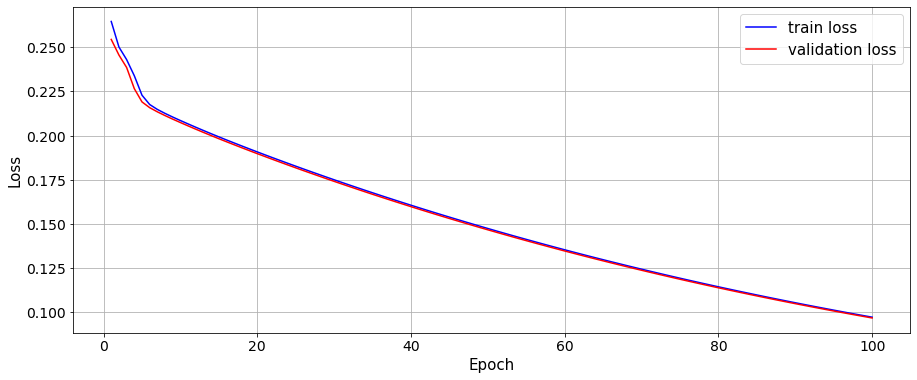

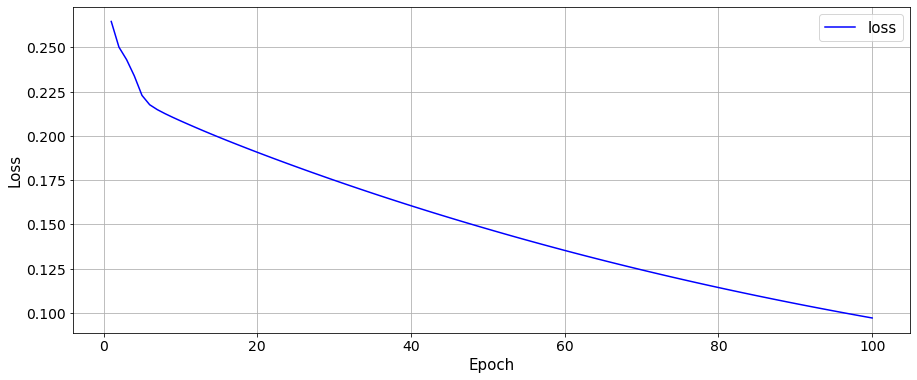

In [69]:
no = 19

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]
val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

# csv_num = len(csv) // rnn_unit_size
# remain = len(csv) % rnn_unit_size
# if remain != 0:
#     csv_num += 1
#     csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

# csv_in = csv_in.reshape(csv_num, rnn_unit_size, 2)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

In [72]:
print(data_input.shape)

(2342, 100, 4)


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_25 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_26 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 92ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 2/100
10/10 [==============================] - 1s 75ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 3/100
10/10 [==============================] - 1s 77ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_lo

10/10 [==============================] - 1s 73ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 47/100
10/10 [==============================] - 1s 75ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 48/100
10/10 [==============================] - 1s 75ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 49/100
10/10 [==============================] - 1s 82ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 50/100
10/10 [==============================] - 1s 80ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 51/100
10/10 [==============================] - 1s 78ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 52/100
10/10 [===

Epoch 96/100
10/10 [==============================] - 1s 74ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 97/100
10/10 [==============================] - 1s 74ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 98/100
10/10 [==============================] - 1s 74ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 99/100
10/10 [==============================] - 1s 75ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Epoch 100/100
10/10 [==============================] - 1s 76ms/step - loss: 0.8233 - mse: 0.8233 - mae: 0.8939 - val_loss: 0.8233 - val_mse: 0.8233 - val_mae: 0.8939
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_25 (Sim

<function matplotlib.pyplot.show(close=None, block=None)>

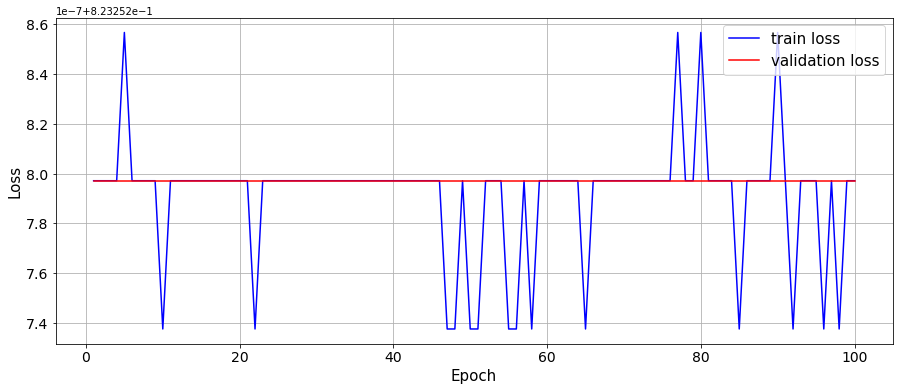

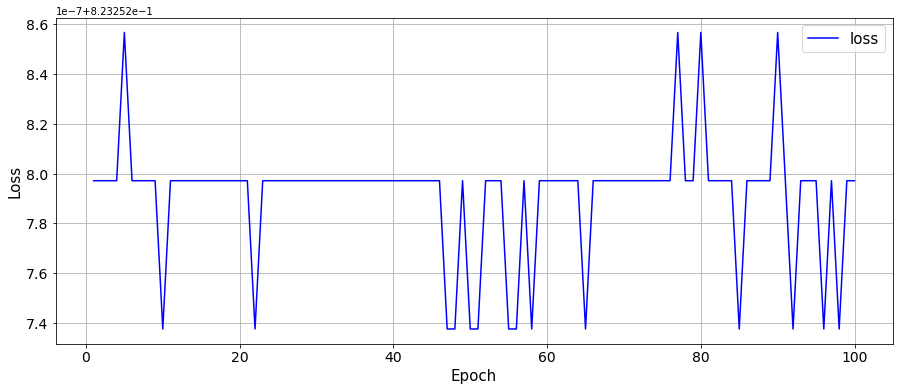

In [74]:
no = 20

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]
val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
model.add(tf.keras.layers.Dense(1, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '_{epoch:02d}_{loss:.4f}.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_28 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_29 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 88ms/step - loss: 0.5305 - mse: 0.5305 - mae: 0.7084 - val_loss: 0.3226 - val_mse: 0.3226 - val_mae: 0.5453
Epoch 2/100
10/10 [==============================] - 1s 73ms/step - loss: 0.1963 - mse: 0.1963 - mae: 0.4101 - val_loss: 0.0713 - val_mse: 0.0713 - val_mae: 0.2428
Epoch 3/100
10/10 [==============================] - 1s 73ms/step - loss: 0.0447 - mse: 0.0447 - mae: 0.1856 - val_lo

10/10 [==============================] - 1s 76ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1179 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1182
Epoch 47/100
10/10 [==============================] - 1s 75ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1179 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1175
Epoch 48/100
10/10 [==============================] - 1s 75ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1177 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1177
Epoch 49/100
10/10 [==============================] - 1s 74ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1174 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1174
Epoch 50/100
10/10 [==============================] - 1s 74ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1176 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1177
Epoch 51/100
10/10 [==============================] - 1s 74ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1177 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1174
Epoch 52/100
10/10 [===

Epoch 96/100
10/10 [==============================] - 1s 74ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1174 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1172
Epoch 97/100
10/10 [==============================] - 1s 76ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1172 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1176
Epoch 98/100
10/10 [==============================] - 1s 76ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1180 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1180
Epoch 99/100
10/10 [==============================] - 1s 74ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1173 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1167
Epoch 100/100
10/10 [==============================] - 1s 74ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1166 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1171
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_28 (Sim

<function matplotlib.pyplot.show(close=None, block=None)>

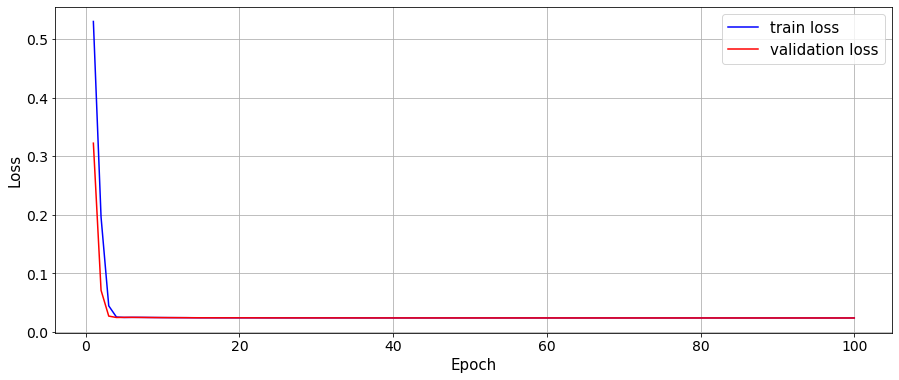

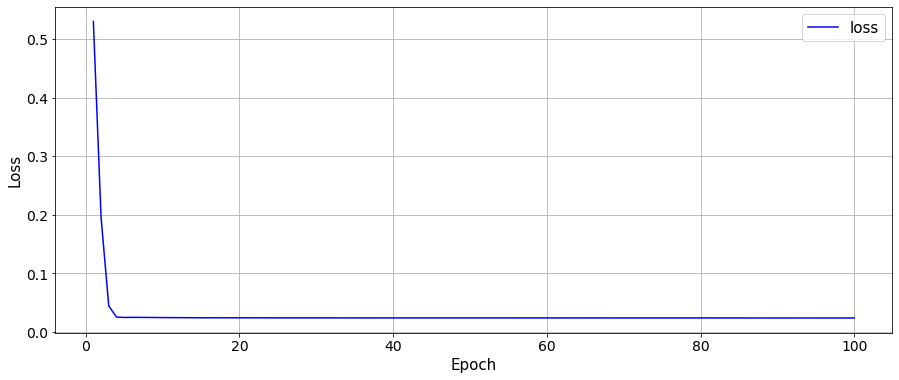

In [77]:
no = 23

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]
data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]
val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_28 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_29 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 94ms/step
Result
[0.094394 0.105993 0.120409 0.100267 0.114323 0.09631  0.111775 0.095958 0.104735 0.107648 0.101516 0.133075 0.109364 0.096115 0.097632 0.10412  0.113282 0.106078 0.096538 0.123216 0.095799 0.092415 0.094509 0.12148  0.60732 ]
0.094394
0.105993
0.120409
0.100267
0.114323
0.096310
0.111775
0.095958
0.104735
0.107648
0.101516
0.133075
0.109364
0.096115
0.097632
0.104120
0.113282
0.1060

<function matplotlib.pyplot.show(close=None, block=None)>

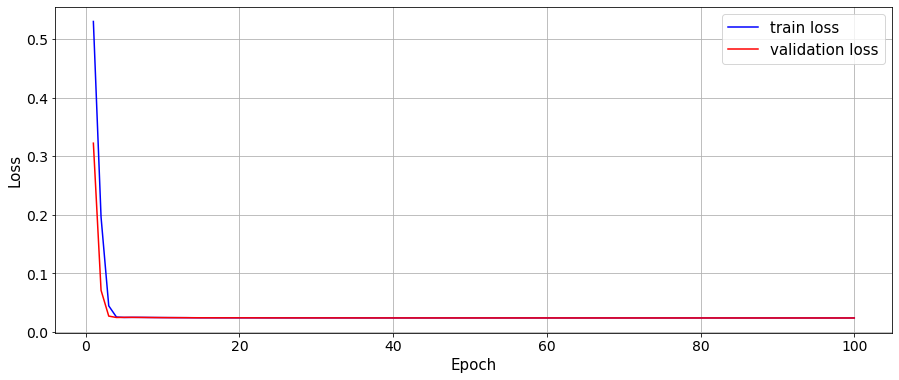

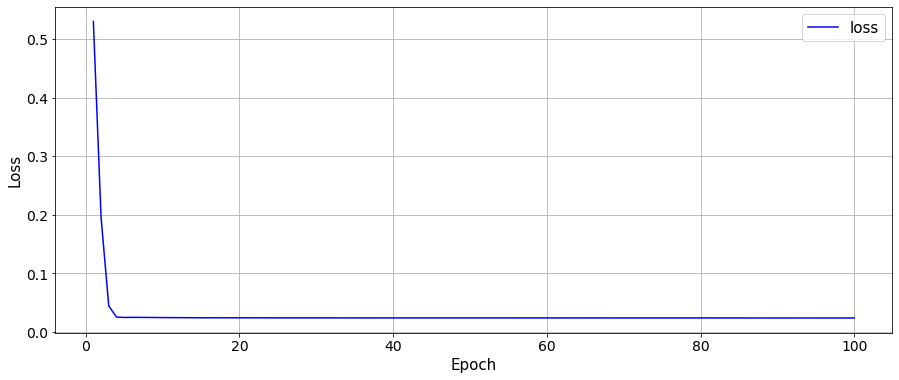

In [78]:
model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

In [84]:
csv = np.genfromtxt('..\\Data2\\RiMS_' + shoes_course + '_tR' + str(tR) + '.csv', delimiter=',')
print(csv)

[[ 4.60e+01  0.00e+00  6.00e-02  1.01e+01  1.00e-03]
 [ 4.70e+01  0.00e+00  1.30e-01  1.01e+01  1.00e-03]
 [ 4.70e+01  0.00e+00  2.70e-01  1.01e+01  1.00e-03]
 [ 4.70e+01  0.00e+00  2.30e-01  1.01e+01  1.00e-03]
 [ 4.70e+01  0.00e+00  2.90e-01  1.01e+01  1.00e-03]
 [ 4.70e+01  0.00e+00  4.60e-01  1.01e+01  1.00e-03]
 [ 4.70e+01  0.00e+00  5.30e-01  1.01e+01  1.00e-03]
 [ 4.70e+01  0.00e+00  7.40e-01  1.01e+01  1.00e-03]
 [ 4.70e+01  0.00e+00  7.40e-01  1.01e+01  1.00e-03]
 [ 4.70e+01  0.00e+00  6.40e-01  1.01e+01  1.00e-03]
 [ 4.70e+01  0.00e+00  6.20e-01  8.50e+00  1.90e-01]
 [ 4.80e+01  0.00e+00  7.20e-01  8.40e+00  1.90e-01]
 [ 4.70e+01  0.00e+00  5.00e-01  8.40e+00  1.90e-01]
 [ 4.80e+01  0.00e+00  5.30e-01  8.20e+00  1.90e-01]
 [ 4.80e+01  0.00e+00  4.00e-01  8.40e+00  1.90e-01]
 [ 4.80e+01  0.00e+00  5.60e-01  8.10e+00  1.90e-01]
 [ 4.80e+01  0.00e+00  5.20e-01  8.10e+00  1.90e-01]
 [ 4.80e+01  0.00e+00  3.80e-01  8.10e+00  1.90e-01]
 [ 4.80e+01  0.00e+00  1.90e-01  8.20e+00  1.9

In [86]:
csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])
    
# $csv_num = len(csv) // rnn_unit_size

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)

In [87]:
print(csv_in)

[[[ 4.60e+01  0.00e+00  6.00e-02  1.01e+01]
  [ 4.70e+01  0.00e+00  1.30e-01  1.01e+01]
  [ 4.70e+01  0.00e+00  2.70e-01  1.01e+01]
  [ 4.70e+01  0.00e+00  2.30e-01  1.01e+01]
  [ 4.70e+01  0.00e+00  2.90e-01  1.01e+01]
  [ 4.70e+01  0.00e+00  4.60e-01  1.01e+01]
  [ 4.70e+01  0.00e+00  5.30e-01  1.01e+01]
  [ 4.70e+01  0.00e+00  7.40e-01  1.01e+01]
  [ 4.70e+01  0.00e+00  7.40e-01  1.01e+01]
  [ 4.70e+01  0.00e+00  6.40e-01  1.01e+01]
  [ 4.70e+01  0.00e+00  6.20e-01  8.50e+00]
  [ 4.80e+01  0.00e+00  7.20e-01  8.40e+00]
  [ 4.70e+01  0.00e+00  5.00e-01  8.40e+00]
  [ 4.80e+01  0.00e+00  5.30e-01  8.20e+00]
  [ 4.80e+01  0.00e+00  4.00e-01  8.40e+00]
  [ 4.80e+01  0.00e+00  5.60e-01  8.10e+00]
  [ 4.80e+01  0.00e+00  5.20e-01  8.10e+00]
  [ 4.80e+01  0.00e+00  3.80e-01  8.10e+00]
  [ 4.80e+01  0.00e+00  1.90e-01  8.20e+00]
  [ 4.80e+01  0.00e+00  3.60e-01  8.30e+00]
  [ 4.80e+01  0.00e+00  1.60e-01  8.40e+00]
  [ 4.80e+01  0.00e+00  2.00e-01  1.01e+01]
  [ 4.80e+01  0.00e+00  1.80e-01

In [88]:
print(csv_in.shape)

(25, 100, 4)


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_28 (SimpleRNN)   (None, 100)               10500     
                                                                 
 dense_29 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
74/74 [==============================] - 0s 5ms/step
Result
[0.094394 0.094333 0.094907 0.095244 0.095716 0.096436 0.096121 0.096436 0.096356 0.097588 0.097582 0.099273 0.099824 0.099742 0.095607 0.09581  0.09647  0.098059 0.098011 0.098013 0.09798  0.097947 0.097931 0.101635 0.101765 0.10514  0.106981 0.108774 0.107522 0.104534 0.102063 0.102973 0.102918 0.105065 0.10517  0.106096 0.106332 0.106001 0.103826 0.106466 0.109834 0.108909 0.1092

<function matplotlib.pyplot.show(close=None, block=None)>

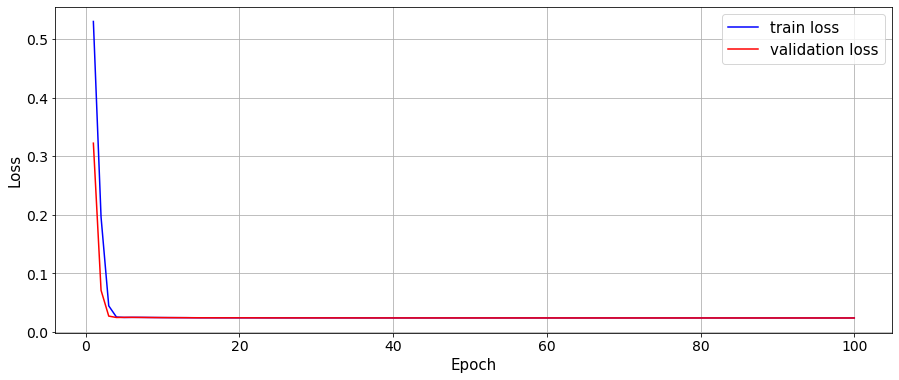

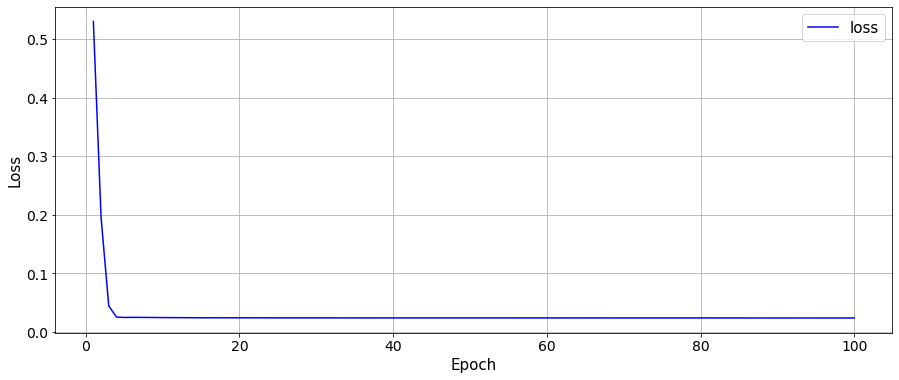

In [90]:
model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(data_input)
result = result.flatten()
result = result[:len(csv)]

print("Result")
print(result)
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_29 (SimpleRNN)   (None, 100)               10500     
                                                                 
Total params: 10,500
Trainable params: 10,500
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 86ms/step - loss: 0.9544 - mse: 0.9544 - mae: 0.9403 - val_loss: 0.9262 - val_mse: 0.9262 - val_mae: 0.9187
Epoch 2/100
10/10 [==============================] - 1s 68ms/step - loss: 0.9057 - mse: 0.9057 - mae: 0.9043 - val_loss: 0.8733 - val_mse: 0.8733 - val_mae: 0.8805
Epoch 3/100
10/10 [==============================] - 1s 68ms/step - loss: 0.8502 - mse: 0.8502 - mae: 0.8623 - val_loss: 0.8165 - val_mse: 0.8165 - val_mae: 0.8368
Epoch 4/100
10/10 [==============================] - 1s 71ms/step - loss: 0.7906 - ms

10/10 [==============================] - 1s 63ms/step - loss: 0.0654 - mse: 0.0654 - mae: 0.1773 - val_loss: 0.0651 - val_mse: 0.0651 - val_mae: 0.1772
Epoch 48/100
10/10 [==============================] - 1s 64ms/step - loss: 0.0646 - mse: 0.0646 - mae: 0.1753 - val_loss: 0.0641 - val_mse: 0.0641 - val_mae: 0.1741
Epoch 49/100
10/10 [==============================] - 1s 68ms/step - loss: 0.0640 - mse: 0.0640 - mae: 0.1743 - val_loss: 0.0636 - val_mse: 0.0636 - val_mae: 0.1730
Epoch 50/100
10/10 [==============================] - 1s 66ms/step - loss: 0.0635 - mse: 0.0635 - mae: 0.1731 - val_loss: 0.0634 - val_mse: 0.0634 - val_mae: 0.1743
Epoch 51/100
10/10 [==============================] - 1s 65ms/step - loss: 0.0630 - mse: 0.0630 - mae: 0.1723 - val_loss: 0.0626 - val_mse: 0.0626 - val_mae: 0.1705
Epoch 52/100
10/10 [==============================] - 1s 66ms/step - loss: 0.0625 - mse: 0.0625 - mae: 0.1709 - val_loss: 0.0632 - val_mse: 0.0632 - val_mae: 0.1718
Epoch 53/100
10/10 [===

Epoch 97/100
10/10 [==============================] - 1s 66ms/step - loss: 0.0410 - mse: 0.0410 - mae: 0.1422 - val_loss: 0.0408 - val_mse: 0.0408 - val_mae: 0.1422
Epoch 98/100
10/10 [==============================] - 1s 67ms/step - loss: 0.0408 - mse: 0.0408 - mae: 0.1413 - val_loss: 0.0406 - val_mse: 0.0406 - val_mae: 0.1402
Epoch 99/100
10/10 [==============================] - 1s 69ms/step - loss: 0.0406 - mse: 0.0406 - mae: 0.1404 - val_loss: 0.0405 - val_mse: 0.0405 - val_mae: 0.1393
Epoch 100/100
10/10 [==============================] - 1s 69ms/step - loss: 0.0404 - mse: 0.0404 - mae: 0.1396 - val_loss: 0.0403 - val_mse: 0.0403 - val_mae: 0.1409
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_29 (SimpleRNN)   (None, 100)               10500     
                                                                 
Total params: 10,500
Trainable params: 10,500
Non-tr

<function matplotlib.pyplot.show(close=None, block=None)>

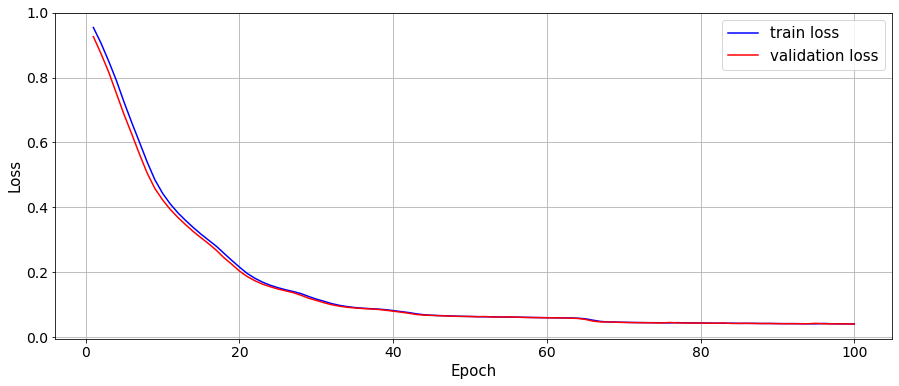

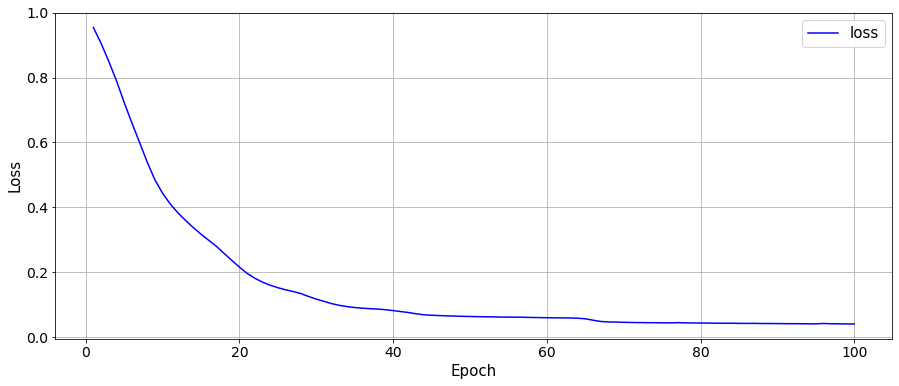

In [91]:
# no11 꺼 복사. 2441행 나와서
no = 24

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

In [92]:
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

    

0.067642
0.154244
-0.007039
-0.097055
0.095323
0.113125
0.125563
0.297486
0.154172
-0.130047
0.281660
0.100655
0.163465
0.076305
-0.012879
-0.245318
-0.273402
0.101893
0.060611
1.000000
0.333189
0.125358
0.264914
-0.187379
-0.019245
0.078017
0.040196
0.178523
0.332343
0.271826
0.150088
0.342165
0.170795
0.120729
0.059068
-0.014526
0.049071
0.041112
-0.070506
0.316026
0.096071
0.341458
0.168403
0.020847
0.286111
0.133675
-0.020487
0.120146
0.162930
0.077509
0.004664
0.275138
-0.156965
0.118410
0.056120
0.287043
0.174610
0.105114
0.088955
0.183369
-0.237347
0.148643
0.208422
0.157292
0.153425
0.107598
0.052729
0.148918
0.089567
0.098436
0.411858
0.250257
-0.134304
0.130590
0.132752
0.180052
0.278833
0.088813
0.157729
0.305330
0.102806
-0.147941
0.167382
0.105951
0.196378
0.204985
0.031181
0.171972
0.010156
0.172401
0.120148
0.235844
0.046304
0.251056
0.170526
0.328423
0.013251
0.023229
0.156029
0.106345
0.033449
0.223229
0.122764
-0.001907
0.063729
0.108353
0.084678
0.283735
0.158766
0.1

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_30 (SimpleRNN)   (None, 100)               10500     
                                                                 
Total params: 10,500
Trainable params: 10,500
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
10/10 [==============================] - 1s 96ms/step - loss: 0.9217 - mse: 0.9217 - mae: 0.9136 - val_loss: 0.8999 - val_mse: 0.8999 - val_mae: 0.8940
Epoch 2/300
10/10 [==============================] - 1s 78ms/step - loss: 0.8869 - mse: 0.8869 - mae: 0.8836 - val_loss: 0.8662 - val_mse: 0.8662 - val_mae: 0.8681
Epoch 3/300
10/10 [==============================] - 1s 78ms/step - loss: 0.8489 - mse: 0.8489 - mae: 0.8559 - val_loss: 0.8212 - val_mse: 0.8212 - val_mae: 0.8365
Epoch 4/300
10/10 [==============================] - 1s 73ms/step - loss: 0.7982 - ms

10/10 [==============================] - 1s 67ms/step - loss: 0.0786 - mse: 0.0786 - mae: 0.1962 - val_loss: 0.0777 - val_mse: 0.0777 - val_mae: 0.1945
Epoch 48/300
10/10 [==============================] - 1s 65ms/step - loss: 0.0774 - mse: 0.0774 - mae: 0.1938 - val_loss: 0.0768 - val_mse: 0.0768 - val_mae: 0.1928
Epoch 49/300
10/10 [==============================] - 1s 63ms/step - loss: 0.0767 - mse: 0.0767 - mae: 0.1924 - val_loss: 0.0760 - val_mse: 0.0760 - val_mae: 0.1913
Epoch 50/300
10/10 [==============================] - 1s 64ms/step - loss: 0.0759 - mse: 0.0759 - mae: 0.1904 - val_loss: 0.0752 - val_mse: 0.0752 - val_mae: 0.1898
Epoch 51/300
10/10 [==============================] - 1s 64ms/step - loss: 0.0751 - mse: 0.0751 - mae: 0.1893 - val_loss: 0.0746 - val_mse: 0.0746 - val_mae: 0.1881
Epoch 52/300
10/10 [==============================] - 1s 64ms/step - loss: 0.0744 - mse: 0.0744 - mae: 0.1876 - val_loss: 0.0740 - val_mse: 0.0740 - val_mae: 0.1868
Epoch 53/300
10/10 [===

Epoch 97/300
10/10 [==============================] - 1s 79ms/step - loss: 0.0607 - mse: 0.0607 - mae: 0.1612 - val_loss: 0.0606 - val_mse: 0.0606 - val_mae: 0.1621
Epoch 98/300
10/10 [==============================] - 1s 81ms/step - loss: 0.0604 - mse: 0.0604 - mae: 0.1603 - val_loss: 0.0600 - val_mse: 0.0600 - val_mae: 0.1590
Epoch 99/300
10/10 [==============================] - 1s 79ms/step - loss: 0.0602 - mse: 0.0602 - mae: 0.1596 - val_loss: 0.0607 - val_mse: 0.0607 - val_mae: 0.1588
Epoch 100/300
10/10 [==============================] - 1s 80ms/step - loss: 0.0606 - mse: 0.0606 - mae: 0.1605 - val_loss: 0.0612 - val_mse: 0.0612 - val_mae: 0.1652
Epoch 101/300
10/10 [==============================] - 1s 80ms/step - loss: 0.0603 - mse: 0.0603 - mae: 0.1600 - val_loss: 0.0601 - val_mse: 0.0601 - val_mae: 0.1617
Epoch 102/300
10/10 [==============================] - 1s 80ms/step - loss: 0.0600 - mse: 0.0600 - mae: 0.1596 - val_loss: 0.0596 - val_mse: 0.0596 - val_mae: 0.1578
Epoch 1

10/10 [==============================] - 1s 78ms/step - loss: 0.0563 - mse: 0.0563 - mae: 0.1528 - val_loss: 0.0563 - val_mse: 0.0563 - val_mae: 0.1492
Epoch 147/300
10/10 [==============================] - 1s 79ms/step - loss: 0.0561 - mse: 0.0561 - mae: 0.1515 - val_loss: 0.0558 - val_mse: 0.0558 - val_mae: 0.1508
Epoch 148/300
10/10 [==============================] - 1s 76ms/step - loss: 0.0559 - mse: 0.0559 - mae: 0.1507 - val_loss: 0.0557 - val_mse: 0.0557 - val_mae: 0.1507
Epoch 149/300
10/10 [==============================] - 1s 77ms/step - loss: 0.0557 - mse: 0.0557 - mae: 0.1504 - val_loss: 0.0556 - val_mse: 0.0556 - val_mae: 0.1500
Epoch 150/300
10/10 [==============================] - 1s 79ms/step - loss: 0.0557 - mse: 0.0557 - mae: 0.1509 - val_loss: 0.0557 - val_mse: 0.0557 - val_mae: 0.1503
Epoch 151/300
10/10 [==============================] - 1s 77ms/step - loss: 0.0558 - mse: 0.0558 - mae: 0.1503 - val_loss: 0.0558 - val_mse: 0.0558 - val_mae: 0.1527
Epoch 152/300
10/1

10/10 [==============================] - 1s 66ms/step - loss: 0.0526 - mse: 0.0526 - mae: 0.1425 - val_loss: 0.0524 - val_mse: 0.0524 - val_mae: 0.1412
Epoch 196/300
10/10 [==============================] - 1s 64ms/step - loss: 0.0524 - mse: 0.0524 - mae: 0.1421 - val_loss: 0.0529 - val_mse: 0.0529 - val_mae: 0.1455
Epoch 197/300
10/10 [==============================] - 1s 67ms/step - loss: 0.0523 - mse: 0.0523 - mae: 0.1422 - val_loss: 0.0530 - val_mse: 0.0530 - val_mae: 0.1414
Epoch 198/300
10/10 [==============================] - 1s 65ms/step - loss: 0.0525 - mse: 0.0525 - mae: 0.1427 - val_loss: 0.0526 - val_mse: 0.0526 - val_mae: 0.1455
Epoch 199/300
10/10 [==============================] - 1s 66ms/step - loss: 0.0524 - mse: 0.0524 - mae: 0.1424 - val_loss: 0.0561 - val_mse: 0.0561 - val_mae: 0.1586
Epoch 200/300
10/10 [==============================] - 1s 64ms/step - loss: 0.0536 - mse: 0.0536 - mae: 0.1466 - val_loss: 0.0529 - val_mse: 0.0529 - val_mae: 0.1432
Epoch 201/300
10/1

10/10 [==============================] - 1s 71ms/step - loss: 0.0504 - mse: 0.0504 - mae: 0.1377 - val_loss: 0.0505 - val_mse: 0.0505 - val_mae: 0.1355
Epoch 245/300
10/10 [==============================] - 1s 70ms/step - loss: 0.0504 - mse: 0.0504 - mae: 0.1374 - val_loss: 0.0501 - val_mse: 0.0501 - val_mae: 0.1389
Epoch 246/300
10/10 [==============================] - 1s 72ms/step - loss: 0.0505 - mse: 0.0505 - mae: 0.1385 - val_loss: 0.0504 - val_mse: 0.0504 - val_mae: 0.1353
Epoch 247/300
10/10 [==============================] - 1s 72ms/step - loss: 0.0506 - mse: 0.0506 - mae: 0.1386 - val_loss: 0.0503 - val_mse: 0.0503 - val_mae: 0.1365
Epoch 248/300
10/10 [==============================] - 1s 74ms/step - loss: 0.0514 - mse: 0.0514 - mae: 0.1409 - val_loss: 0.0519 - val_mse: 0.0519 - val_mae: 0.1454
Epoch 249/300
10/10 [==============================] - 1s 75ms/step - loss: 0.0507 - mse: 0.0507 - mae: 0.1389 - val_loss: 0.0508 - val_mse: 0.0508 - val_mae: 0.1370
Epoch 250/300
10/1

10/10 [==============================] - 1s 117ms/step - loss: 0.0368 - mse: 0.0368 - mae: 0.1248 - val_loss: 0.0367 - val_mse: 0.0367 - val_mae: 0.1276
Epoch 294/300
10/10 [==============================] - 1s 126ms/step - loss: 0.0363 - mse: 0.0363 - mae: 0.1230 - val_loss: 0.0368 - val_mse: 0.0368 - val_mae: 0.1232
Epoch 295/300
10/10 [==============================] - 1s 113ms/step - loss: 0.0366 - mse: 0.0366 - mae: 0.1244 - val_loss: 0.0359 - val_mse: 0.0359 - val_mae: 0.1219
Epoch 296/300
10/10 [==============================] - 1s 113ms/step - loss: 0.0361 - mse: 0.0361 - mae: 0.1224 - val_loss: 0.0363 - val_mse: 0.0363 - val_mae: 0.1219
Epoch 297/300
10/10 [==============================] - 1s 120ms/step - loss: 0.0375 - mse: 0.0375 - mae: 0.1273 - val_loss: 0.0366 - val_mse: 0.0366 - val_mae: 0.1270
Epoch 298/300
10/10 [==============================] - 1s 125ms/step - loss: 0.0366 - mse: 0.0366 - mae: 0.1250 - val_loss: 0.0362 - val_mse: 0.0362 - val_mae: 0.1216
Epoch 299/30

<function matplotlib.pyplot.show(close=None, block=None)>

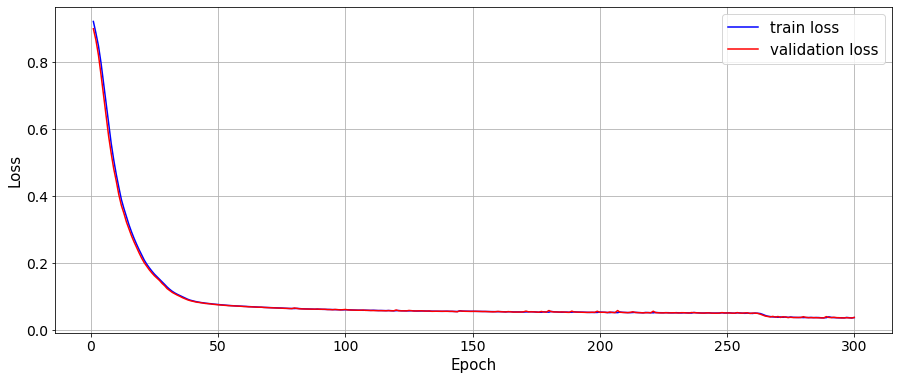

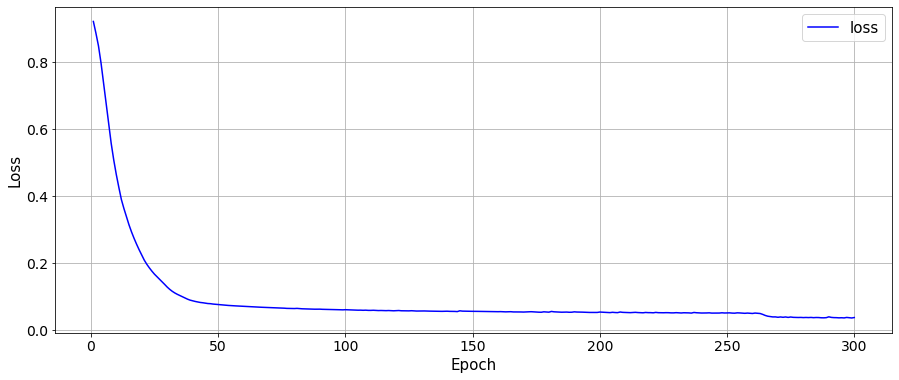

In [93]:
no = 25
epochs=300

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

In [95]:
csv = np.genfromtxt('..\\DS2\\RiMS_' + shoes_course + '_tR' + str(tR) + '_Vs_cal.csv', delimiter=',')
csv_cp = np.genfromtxt('..\\DS2\\RiMS_' + shoes_course + '_tR' + str(tR) +'_Vs_cal.csv', delimiter=',')
print(csv.shape)
print(csv)

(2441, 5)
[[ 4.60e-01  0.00e+00  6.00e-02  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  1.30e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  2.70e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  2.30e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  2.90e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  4.60e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  5.30e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  7.40e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  7.40e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  6.40e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  6.20e-01  8.50e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  7.20e-01  8.40e+00  1.90e-01]
 [ 4.70e-01  0.00e+00  5.00e-01  8.40e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  5.30e-01  8.20e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  4.00e-01  8.40e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  5.60e-01  8.10e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  5.20e-01  8.10e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  3.80e-01  8.10e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  1.90e-01  8.2

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_31 (SimpleRNN)   (None, 100)               10500     
                                                                 
Total params: 10,500
Trainable params: 10,500
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
10/10 [==============================] - 2s 136ms/step - loss: 0.4757 - mse: 0.4757 - mae: 0.6015 - val_loss: 0.4107 - val_mse: 0.4107 - val_mae: 0.5451
Epoch 2/300
10/10 [==============================] - 1s 112ms/step - loss: 0.3781 - mse: 0.3781 - mae: 0.5176 - val_loss: 0.3350 - val_mse: 0.3350 - val_mae: 0.4809
Epoch 3/300
10/10 [==============================] - 1s 123ms/step - loss: 0.3096 - mse: 0.3096 - mae: 0.4594 - val_loss: 0.2765 - val_mse: 0.2765 - val_mae: 0.4316
Epoch 4/300
10/10 [==============================] - 1s 129ms/step - loss: 0.2583 

10/10 [==============================] - 1s 103ms/step - loss: 0.0352 - mse: 0.0352 - mae: 0.1413 - val_loss: 0.0345 - val_mse: 0.0345 - val_mae: 0.1402
Epoch 48/300
10/10 [==============================] - 1s 98ms/step - loss: 0.0348 - mse: 0.0348 - mae: 0.1409 - val_loss: 0.0348 - val_mse: 0.0348 - val_mae: 0.1394
Epoch 49/300
10/10 [==============================] - 1s 91ms/step - loss: 0.0346 - mse: 0.0346 - mae: 0.1402 - val_loss: 0.0341 - val_mse: 0.0341 - val_mae: 0.1383
Epoch 50/300
10/10 [==============================] - 1s 89ms/step - loss: 0.0342 - mse: 0.0342 - mae: 0.1388 - val_loss: 0.0344 - val_mse: 0.0344 - val_mae: 0.1406
Epoch 51/300
10/10 [==============================] - 1s 87ms/step - loss: 0.0341 - mse: 0.0341 - mae: 0.1390 - val_loss: 0.0341 - val_mse: 0.0341 - val_mae: 0.1398
Epoch 52/300
10/10 [==============================] - 1s 85ms/step - loss: 0.0339 - mse: 0.0339 - mae: 0.1384 - val_loss: 0.0337 - val_mse: 0.0337 - val_mae: 0.1365
Epoch 53/300
10/10 [==

Epoch 97/300
10/10 [==============================] - 1s 65ms/step - loss: 0.0283 - mse: 0.0283 - mae: 0.1240 - val_loss: 0.0287 - val_mse: 0.0287 - val_mae: 0.1232
Epoch 98/300
10/10 [==============================] - 1s 67ms/step - loss: 0.0284 - mse: 0.0284 - mae: 0.1253 - val_loss: 0.0276 - val_mse: 0.0276 - val_mae: 0.1237
Epoch 99/300
10/10 [==============================] - 1s 65ms/step - loss: 0.0277 - mse: 0.0277 - mae: 0.1227 - val_loss: 0.0274 - val_mse: 0.0274 - val_mae: 0.1241
Epoch 100/300
10/10 [==============================] - 1s 67ms/step - loss: 0.0272 - mse: 0.0272 - mae: 0.1217 - val_loss: 0.0271 - val_mse: 0.0271 - val_mae: 0.1209
Epoch 101/300
10/10 [==============================] - 1s 63ms/step - loss: 0.0270 - mse: 0.0270 - mae: 0.1211 - val_loss: 0.0268 - val_mse: 0.0268 - val_mae: 0.1211
Epoch 102/300
10/10 [==============================] - 1s 65ms/step - loss: 0.0268 - mse: 0.0268 - mae: 0.1206 - val_loss: 0.0273 - val_mse: 0.0273 - val_mae: 0.1249
Epoch 1

10/10 [==============================] - 1s 99ms/step - loss: 0.0243 - mse: 0.0243 - mae: 0.1140 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.1134
Epoch 147/300
10/10 [==============================] - 1s 105ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1135 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.1122
Epoch 148/300
10/10 [==============================] - 1s 107ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1136 - val_loss: 0.0235 - val_mse: 0.0235 - val_mae: 0.1112
Epoch 149/300
10/10 [==============================] - 1s 108ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1121 - val_loss: 0.0235 - val_mse: 0.0235 - val_mae: 0.1123
Epoch 150/300
10/10 [==============================] - 1s 122ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1127 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1108
Epoch 151/300
10/10 [==============================] - 1s 132ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1119 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.1106
Epoch 152/300

10/10 [==============================] - 1s 77ms/step - loss: 0.0223 - mse: 0.0223 - mae: 0.1087 - val_loss: 0.0217 - val_mse: 0.0217 - val_mae: 0.1059
Epoch 196/300
10/10 [==============================] - 1s 77ms/step - loss: 0.0216 - mse: 0.0216 - mae: 0.1060 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1048
Epoch 197/300
10/10 [==============================] - 1s 78ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.1051 - val_loss: 0.0214 - val_mse: 0.0214 - val_mae: 0.1066
Epoch 198/300
10/10 [==============================] - 1s 76ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.1052 - val_loss: 0.0212 - val_mse: 0.0212 - val_mae: 0.1037
Epoch 199/300
10/10 [==============================] - 1s 72ms/step - loss: 0.0211 - mse: 0.0211 - mae: 0.1044 - val_loss: 0.0210 - val_mse: 0.0210 - val_mae: 0.1041
Epoch 200/300
10/10 [==============================] - 1s 71ms/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1044 - val_loss: 0.0211 - val_mse: 0.0211 - val_mae: 0.1065
Epoch 201/300
10/1

10/10 [==============================] - 1s 65ms/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1010 - val_loss: 0.0209 - val_mse: 0.0209 - val_mae: 0.1086
Epoch 245/300
10/10 [==============================] - 1s 65ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.1034 - val_loss: 0.0203 - val_mse: 0.0203 - val_mae: 0.1036
Epoch 246/300
10/10 [==============================] - 1s 63ms/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1016 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.0990
Epoch 247/300
10/10 [==============================] - 1s 63ms/step - loss: 0.0200 - mse: 0.0200 - mae: 0.1013 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1002
Epoch 248/300
10/10 [==============================] - 1s 63ms/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1007 - val_loss: 0.0198 - val_mse: 0.0198 - val_mae: 0.1001
Epoch 249/300
10/10 [==============================] - 1s 64ms/step - loss: 0.0197 - mse: 0.0197 - mae: 0.1008 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.0989
Epoch 250/300
10/1

10/10 [==============================] - 1s 63ms/step - loss: 0.0190 - mse: 0.0190 - mae: 0.0985 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.0996
Epoch 294/300
10/10 [==============================] - 1s 64ms/step - loss: 0.0189 - mse: 0.0189 - mae: 0.0981 - val_loss: 0.0186 - val_mse: 0.0186 - val_mae: 0.0951
Epoch 295/300
10/10 [==============================] - 1s 65ms/step - loss: 0.0185 - mse: 0.0185 - mae: 0.0966 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.0953
Epoch 296/300
10/10 [==============================] - 1s 65ms/step - loss: 0.0186 - mse: 0.0186 - mae: 0.0972 - val_loss: 0.0190 - val_mse: 0.0190 - val_mae: 0.0955
Epoch 297/300
10/10 [==============================] - 1s 65ms/step - loss: 0.0189 - mse: 0.0189 - mae: 0.0979 - val_loss: 0.0186 - val_mse: 0.0186 - val_mae: 0.0950
Epoch 298/300
10/10 [==============================] - 1s 63ms/step - loss: 0.0185 - mse: 0.0185 - mae: 0.0966 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.0953
Epoch 299/300
10/1

<function matplotlib.pyplot.show(close=None, block=None)>

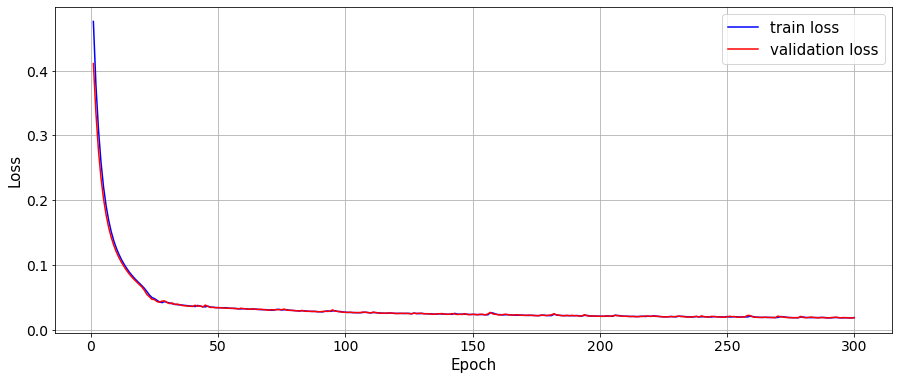

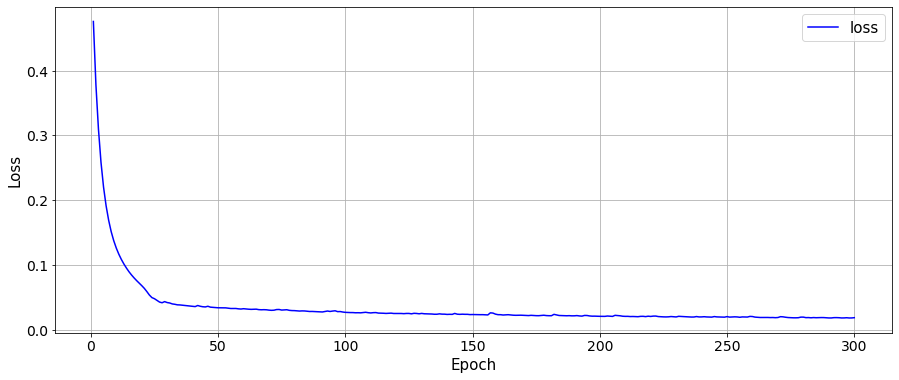

In [96]:
no = 26
epochs=300

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

In [97]:
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

-0.067592
0.095596
0.092988
-0.030448
-0.079709
0.046369
0.140890
-0.003012
0.091122
0.086510
0.246423
0.058848
0.092992
0.039676
-0.059015
0.316730
0.058361
-0.058855
0.085536
0.067506
-0.047512
0.069189
-0.036727
-0.005006
0.031599
0.092344
-0.083637
0.013671
0.110323
0.074793
0.040618
0.039058
0.103594
-0.019431
0.037429
0.113409
0.089750
-0.002271
0.083360
-0.021973
-0.031497
-0.031377
-0.033540
-0.048030
0.157288
0.004282
0.024094
-0.016740
-0.093030
0.115751
0.112224
-0.045422
-0.010543
-0.056632
-0.009521
0.064091
0.104751
0.023457
0.237653
0.002790
0.133967
0.090296
0.079190
0.055468
-0.040206
0.047911
0.187911
-0.005460
0.190274
0.052245
0.131089
0.236128
0.075288
-0.064857
0.072699
0.051378
-0.076558
-0.065604
0.124682
0.167774
0.011244
-0.028035
-0.022454
0.111957
-0.004819
-0.005604
0.022618
0.012866
-0.057477
0.050035
-0.015677
-0.032523
-0.105260
0.089394
0.032012
-0.073702
-0.133013
0.105646
-0.141734
0.037700
-0.007399
0.054915
0.097886
0.056608
-0.054424
0.009661
0.157

In [101]:
csv = np.genfromtxt('..\\DS2\\RiMS_' + shoes_course + '_tR' + str(tR) + '_Vs_cal.csv', delimiter=',')
csv_cp = np.genfromtxt('..\\DS2\\RiMS_' + shoes_course + '_tR' + str(tR) +'_Vs_cal.csv', delimiter=',')
print(csv.shape)
print(csv)

(2441, 5)
[[ 4.60e-01  0.00e+00  6.00e-02  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  1.30e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  2.70e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  2.30e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  2.90e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  4.60e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  5.30e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  7.40e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  7.40e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  6.40e-01  1.01e+01  1.00e-03]
 [ 4.70e-01  0.00e+00  6.20e-01  8.50e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  7.20e-01  8.40e+00  1.90e-01]
 [ 4.70e-01  0.00e+00  5.00e-01  8.40e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  5.30e-01  8.20e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  4.00e-01  8.40e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  5.60e-01  8.10e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  5.20e-01  8.10e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  3.80e-01  8.10e+00  1.90e-01]
 [ 4.80e-01  0.00e+00  1.90e-01  8.2

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_34 (SimpleRNN)   (None, 10)                150       
                                                                 
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 28ms/step - loss: 1.0459 - mse: 1.0459 - mae: 0.9974 - val_loss: 1.0394 - val_mse: 1.0394 - val_mae: 0.9933
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 1.0345 - mse: 1.0345 - mae: 0.9902 - val_loss: 1.0279 - val_mse: 1.0279 - val_mae: 0.9859
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 1.0228 - mse: 1.0228 - mae: 0.9826 - val_loss: 1.0159 - val_mse: 1.0159 - val_mae: 0.9781
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 1.0106 - mse: 1.0106

Epoch 48/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1786 - mse: 0.1786 - mae: 0.3387 - val_loss: 0.1757 - val_mse: 0.1757 - val_mae: 0.3357
Epoch 49/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1737 - mse: 0.1737 - mae: 0.3335 - val_loss: 0.1708 - val_mse: 0.1708 - val_mae: 0.3304
Epoch 50/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1688 - mse: 0.1688 - mae: 0.3284 - val_loss: 0.1661 - val_mse: 0.1661 - val_mae: 0.3256
Epoch 51/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1643 - mse: 0.1643 - mae: 0.3236 - val_loss: 0.1617 - val_mse: 0.1617 - val_mae: 0.3209
Epoch 52/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1600 - mse: 0.1600 - mae: 0.3189 - val_loss: 0.1575 - val_mse: 0.1575 - val_mae: 0.3161
Epoch 53/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1558 - mse: 0.1558 - mae: 0.3143 - val_loss: 0.1536 - val_mse: 0.1536 - val_mae: 0.3118
Epoch 54/100
10/

Epoch 98/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0657 - mse: 0.0657 - mae: 0.1967 - val_loss: 0.0649 - val_mse: 0.0649 - val_mae: 0.1956
Epoch 99/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0645 - mse: 0.0645 - mae: 0.1946 - val_loss: 0.0638 - val_mse: 0.0638 - val_mae: 0.1934
Epoch 100/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0633 - mse: 0.0633 - mae: 0.1926 - val_loss: 0.0626 - val_mse: 0.0626 - val_mae: 0.1916
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_34 (SimpleRNN)   (None, 10)                150       
                                                                 
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________
8/8 [==============================] - 0s 1ms/step
Result
output_DS2_tR500_27.csv
0.152997

<function matplotlib.pyplot.show(close=None, block=None)>

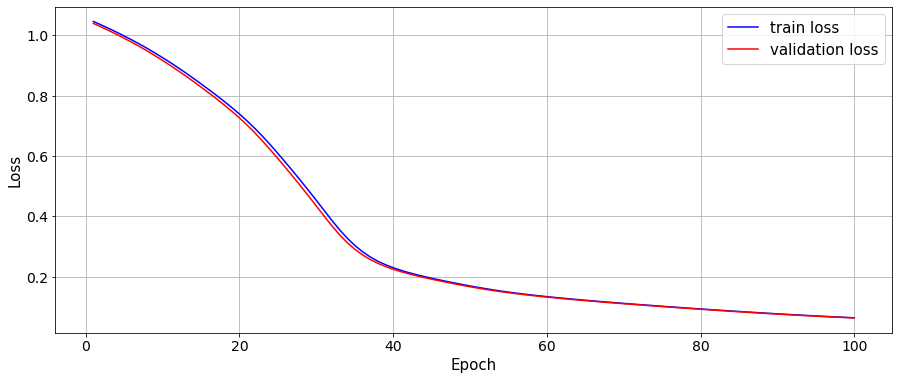

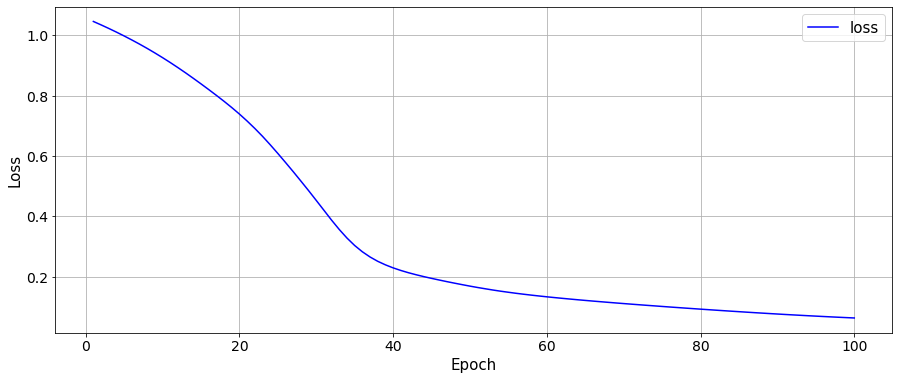

In [103]:
no = 27
epochs=100
rnn_unit_size = 10

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=10, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_35 (SimpleRNN)   (None, 50)                2750      
                                                                 
Total params: 2,750
Trainable params: 2,750
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 44ms/step - loss: 0.5904 - mse: 0.5904 - mae: 0.6808 - val_loss: 0.5584 - val_mse: 0.5584 - val_mae: 0.6557
Epoch 2/100
10/10 [==============================] - 0s 25ms/step - loss: 0.5380 - mse: 0.5380 - mae: 0.6401 - val_loss: 0.5108 - val_mse: 0.5108 - val_mae: 0.6192
Epoch 3/100
10/10 [==============================] - 0s 25ms/step - loss: 0.4928 - mse: 0.4928 - mae: 0.6049 - val_loss: 0.4687 - val_mse: 0.4687 - val_mae: 0.5856
Epoch 4/100
10/10 [==============================] - 0s 27ms/step - loss: 0.4525 - mse:

10/10 [==============================] - 0s 38ms/step - loss: 0.0532 - mse: 0.0532 - mae: 0.1740 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.1738
Epoch 48/100
10/10 [==============================] - 0s 37ms/step - loss: 0.0528 - mse: 0.0528 - mae: 0.1733 - val_loss: 0.0521 - val_mse: 0.0521 - val_mae: 0.1717
Epoch 49/100
10/10 [==============================] - 0s 37ms/step - loss: 0.0518 - mse: 0.0518 - mae: 0.1713 - val_loss: 0.0515 - val_mse: 0.0515 - val_mae: 0.1704
Epoch 50/100
10/10 [==============================] - 0s 36ms/step - loss: 0.0517 - mse: 0.0517 - mae: 0.1709 - val_loss: 0.0514 - val_mse: 0.0514 - val_mae: 0.1703
Epoch 51/100
10/10 [==============================] - 0s 36ms/step - loss: 0.0512 - mse: 0.0512 - mae: 0.1699 - val_loss: 0.0518 - val_mse: 0.0518 - val_mae: 0.1710
Epoch 52/100
10/10 [==============================] - 0s 36ms/step - loss: 0.0509 - mse: 0.0509 - mae: 0.1693 - val_loss: 0.0504 - val_mse: 0.0504 - val_mae: 0.1681
Epoch 53/100
10/10 [===

Epoch 97/100
10/10 [==============================] - 0s 37ms/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1450 - val_loss: 0.0395 - val_mse: 0.0395 - val_mae: 0.1457
Epoch 98/100
10/10 [==============================] - 0s 38ms/step - loss: 0.0391 - mse: 0.0391 - mae: 0.1448 - val_loss: 0.0387 - val_mse: 0.0387 - val_mae: 0.1438
Epoch 99/100
10/10 [==============================] - 0s 37ms/step - loss: 0.0387 - mse: 0.0387 - mae: 0.1438 - val_loss: 0.0384 - val_mse: 0.0384 - val_mae: 0.1430
Epoch 100/100
10/10 [==============================] - 0s 39ms/step - loss: 0.0386 - mse: 0.0386 - mae: 0.1436 - val_loss: 0.0381 - val_mse: 0.0381 - val_mae: 0.1426
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_35 (SimpleRNN)   (None, 50)                2750      
                                                                 
Total params: 2,750
Trainable params: 2,750
Non-trai

<function matplotlib.pyplot.show(close=None, block=None)>

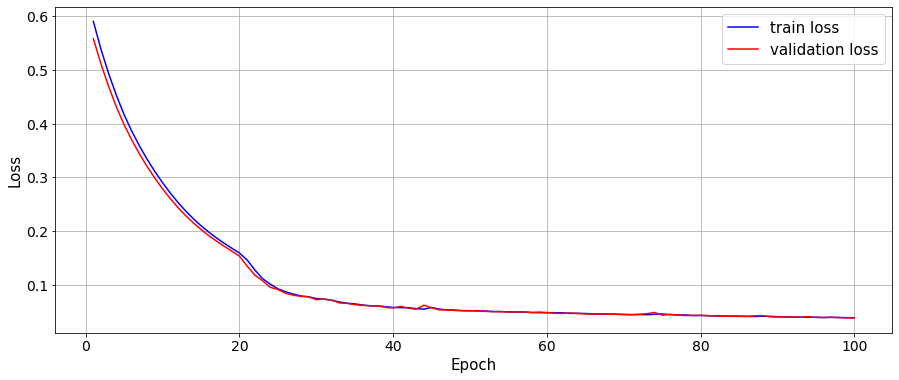

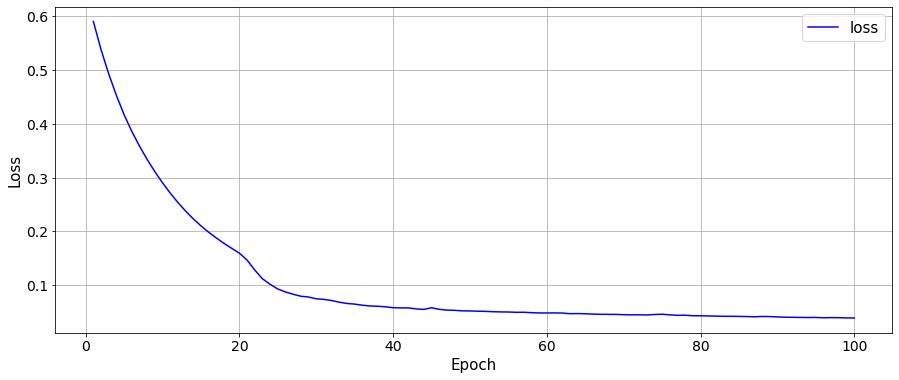

In [104]:
no = 28
epochs=100
rnn_unit_size = 50

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=rnn_unit_size, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

In [105]:
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)


0.086398
0.152885
0.005106
0.103235
0.070861
-0.013680
0.058056
0.170129
0.167279
0.139952
0.049815
0.146665
0.036659
0.113757
0.034387
0.053977
0.098827
0.181558
0.055148
0.059735
0.107079
0.066757
0.185735
0.034098
0.024790
0.178628
0.041430
0.043508
0.028024
0.064310
0.003372
0.155416
-0.015907
0.006369
0.148414
0.128221
0.070039
0.028916
0.091259
0.054689
0.108247
-0.002401
0.152509
0.013864
0.110412
0.002230
0.091215
0.128364
0.023710
0.076632
-0.242629
0.199986
-0.137315
0.167168
-0.056845
-0.266957
0.082808
0.419888
0.005173
0.308275
-0.129450
0.303656
0.010876
0.091892
-0.235678
-0.146020
0.206133
0.329997
0.059304
-0.112617
0.096247
-0.032380
0.485965
0.080165
-0.136907
0.083446
0.026949
0.163573
0.015318
-0.035179
-0.230723
0.158671
0.026162
-0.116333
0.289029
0.207302
0.130510
-0.039447
0.257327
0.050785
0.237033
0.015685
0.171484
0.033033
0.410875
0.218613
0.276984
0.430315
0.010408
0.076423
0.069085
0.142083
-0.031687
0.168826
-0.044577
-0.035794
0.118918
0.146685
0.204602

In [108]:
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%(o if o>0 else temp))
    temp = o if o>0 else temp

0.086398
0.152885
0.005106
0.103235
0.070861
0.070861
0.058056
0.170129
0.167279
0.139952
0.049815
0.146665
0.036659
0.113757
0.034387
0.053977
0.098827
0.181558
0.055148
0.059735
0.107079
0.066757
0.185735
0.034098
0.024790
0.178628
0.041430
0.043508
0.028024
0.064310
0.003372
0.155416
0.155416
0.006369
0.148414
0.128221
0.070039
0.028916
0.091259
0.054689
0.108247
0.108247
0.152509
0.013864
0.110412
0.002230
0.091215
0.128364
0.023710
0.076632
0.076632
0.199986
0.199986
0.167168
0.167168
0.167168
0.082808
0.419888
0.005173
0.308275
0.308275
0.303656
0.010876
0.091892
0.091892
0.091892
0.206133
0.329997
0.059304
0.059304
0.096247
0.096247
0.485965
0.080165
0.080165
0.083446
0.026949
0.163573
0.015318
0.015318
0.015318
0.158671
0.026162
0.026162
0.289029
0.207302
0.130510
0.130510
0.257327
0.050785
0.237033
0.015685
0.171484
0.033033
0.410875
0.218613
0.276984
0.430315
0.010408
0.076423
0.069085
0.142083
0.142083
0.168826
0.168826
0.168826
0.118918
0.146685
0.204602
0.113166
0.059191
0

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_36 (SimpleRNN)   (None, 13)                234       
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 23ms/step - loss: 0.6620 - mse: 0.6620 - mae: 0.7446 - val_loss: 0.6504 - val_mse: 0.6504 - val_mae: 0.7337
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6429 - mse: 0.6429 - mae: 0.7269 - val_loss: 0.6332 - val_mse: 0.6332 - val_mae: 0.7183
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6268 - mse: 0.6268 - mae: 0.7128 - val_loss: 0.6185 - val_mse: 0.6185 - val_mae: 0.7059
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6128 - mse: 0.6128

Epoch 48/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1191 - mse: 0.1191 - mae: 0.2705 - val_loss: 0.1169 - val_mse: 0.1169 - val_mae: 0.2676
Epoch 49/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1153 - mse: 0.1153 - mae: 0.2656 - val_loss: 0.1132 - val_mse: 0.1132 - val_mae: 0.2628
Epoch 50/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1118 - mse: 0.1118 - mae: 0.2609 - val_loss: 0.1098 - val_mse: 0.1098 - val_mae: 0.2583
Epoch 51/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1084 - mse: 0.1084 - mae: 0.2565 - val_loss: 0.1066 - val_mse: 0.1066 - val_mae: 0.2540
Epoch 52/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1054 - mse: 0.1054 - mae: 0.2525 - val_loss: 0.1036 - val_mse: 0.1036 - val_mae: 0.2501
Epoch 53/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1025 - mse: 0.1025 - mae: 0.2487 - val_loss: 0.1007 - val_mse: 0.1007 - val_mae: 0.2464
Epoch 54/500
10/

Epoch 98/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0402 - mse: 0.0402 - mae: 0.1519 - val_loss: 0.0398 - val_mse: 0.0398 - val_mae: 0.1512
Epoch 99/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0396 - mse: 0.0396 - mae: 0.1507 - val_loss: 0.0392 - val_mse: 0.0392 - val_mae: 0.1498
Epoch 100/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0390 - mse: 0.0390 - mae: 0.1493 - val_loss: 0.0387 - val_mse: 0.0387 - val_mae: 0.1487
Epoch 101/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0384 - mse: 0.0384 - mae: 0.1481 - val_loss: 0.0381 - val_mse: 0.0381 - val_mae: 0.1474
Epoch 102/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0379 - mse: 0.0379 - mae: 0.1471 - val_loss: 0.0376 - val_mse: 0.0376 - val_mae: 0.1464
Epoch 103/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0374 - mse: 0.0374 - mae: 0.1459 - val_loss: 0.0371 - val_mse: 0.0371 - val_mae: 0.1453
Epoch 104/50

Epoch 148/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.1153 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.1150
Epoch 149/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0249 - mse: 0.0249 - mae: 0.1151 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1147
Epoch 150/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1145 - val_loss: 0.0247 - val_mse: 0.0247 - val_mae: 0.1143
Epoch 151/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1142 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.1141
Epoch 152/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.1136 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1136
Epoch 153/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0243 - mse: 0.0243 - mae: 0.1133 - val_loss: 0.0242 - val_mse: 0.0242 - val_mae: 0.1132
Epoch 154/

Epoch 198/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0185 - mse: 0.0185 - mae: 0.0976 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.0968
Epoch 199/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0184 - mse: 0.0184 - mae: 0.0970 - val_loss: 0.0185 - val_mse: 0.0185 - val_mae: 0.0964
Epoch 200/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0183 - mse: 0.0183 - mae: 0.0966 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.0960
Epoch 201/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0182 - mse: 0.0182 - mae: 0.0962 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.0961
Epoch 202/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0181 - mse: 0.0181 - mae: 0.0961 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.0969
Epoch 203/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0180 - mse: 0.0180 - mae: 0.0959 - val_loss: 0.0180 - val_mse: 0.0180 - val_mae: 0.0965
Epoch 204/

Epoch 248/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0149 - mse: 0.0149 - mae: 0.0868 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0866
Epoch 249/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0853 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0868
Epoch 250/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - mae: 0.0853 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0846
Epoch 251/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - mae: 0.0852 - val_loss: 0.0144 - val_mse: 0.0144 - val_mae: 0.0846
Epoch 252/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - mae: 0.0847 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0869
Epoch 253/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - mae: 0.0849 - val_loss: 0.0143 - val_mse: 0.0143 - val_mae: 0.0841
Epoch 254/

Epoch 298/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0788 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0780
Epoch 299/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0786 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0784
Epoch 300/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0787 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0783
Epoch 301/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0787 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0804
Epoch 302/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0781 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0787
Epoch 303/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0780 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0774
Epoch 304/

Epoch 348/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0743 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0735
Epoch 349/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0740 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0735
Epoch 350/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0739 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0739
Epoch 351/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0740 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0740
Epoch 352/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0113 - mse: 0.0113 - mae: 0.0736 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0735
Epoch 353/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0113 - mse: 0.0113 - mae: 0.0735 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0740
Epoch 354/

Epoch 398/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0105 - mse: 0.0105 - mae: 0.0707 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0703
Epoch 399/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0105 - mse: 0.0105 - mae: 0.0709 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0718
Epoch 400/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0105 - mse: 0.0105 - mae: 0.0708 - val_loss: 0.0107 - val_mse: 0.0107 - val_mae: 0.0736
Epoch 401/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - mse: 0.0106 - mae: 0.0714 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0708
Epoch 402/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0105 - mse: 0.0105 - mae: 0.0707 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0702
Epoch 403/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0105 - mse: 0.0105 - mae: 0.0711 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0702
Epoch 404/

Epoch 448/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0098 - mse: 0.0098 - mae: 0.0685 - val_loss: 0.0099 - val_mse: 0.0099 - val_mae: 0.0701
Epoch 449/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0098 - mse: 0.0098 - mae: 0.0682 - val_loss: 0.0097 - val_mse: 0.0097 - val_mae: 0.0679
Epoch 450/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0680 - val_loss: 0.0097 - val_mse: 0.0097 - val_mae: 0.0677
Epoch 451/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0678 - val_loss: 0.0098 - val_mse: 0.0098 - val_mae: 0.0692
Epoch 452/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0680 - val_loss: 0.0097 - val_mse: 0.0097 - val_mae: 0.0674
Epoch 453/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0690 - val_loss: 0.0098 - val_mse: 0.0098 - val_mae: 0.0675
Epoch 454/

Epoch 498/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0664 - val_loss: 0.0094 - val_mse: 0.0094 - val_mae: 0.0683
Epoch 499/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0670 - val_loss: 0.0091 - val_mse: 0.0091 - val_mae: 0.0657
Epoch 500/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0659 - val_loss: 0.0093 - val_mse: 0.0093 - val_mae: 0.0676
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_36 (SimpleRNN)   (None, 13)                234       
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 0s 4ms/step
Result
output_DS2_tR500_29.csv
0.0206

<function matplotlib.pyplot.show(close=None, block=None)>

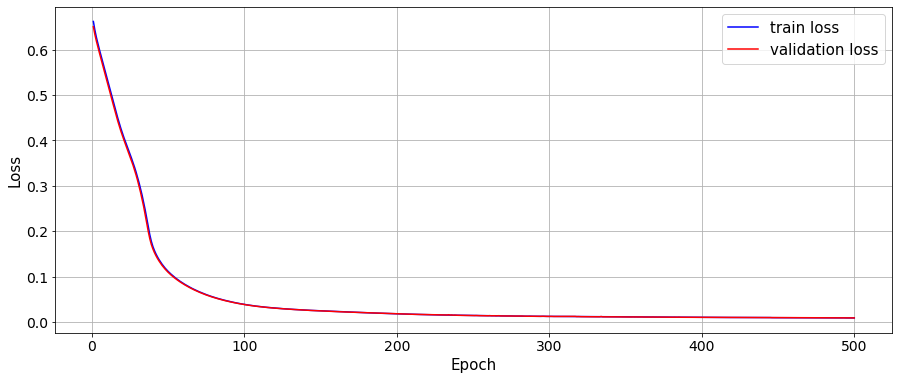

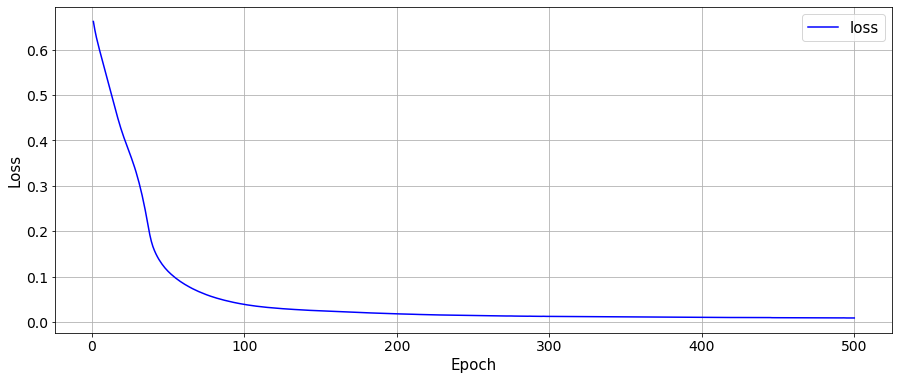

In [109]:
no = 29
epochs=500
rnn_unit_size = 13

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=rnn_unit_size, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

In [110]:
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%(o if o>0 else temp))
    temp = o if o>0 else temp

0.020656
0.004427
0.040138
0.040138
0.040138
0.020144
0.056651
0.011448
0.024672
0.037964
0.036357
0.041877
0.068264
0.060236
0.083004
0.083665
0.080696
0.019255
0.074016
0.087740
0.044889
0.053163
0.053264
0.053264
0.016166
0.016166
0.041438
0.033395
0.061395
0.016677
0.016677
0.038163
0.085163
0.083135
0.075181
0.093030
0.065348
0.089825
0.101234
0.039837
0.041911
0.063919
0.033867
0.033867
0.049620
0.028023
0.004667
0.025629
0.024205
0.024205
0.024205
0.024205
0.015579
0.020695
0.033128
0.033128
0.033128
0.024568
0.024568
0.024568
0.024568
0.024568
0.024568
0.024568
0.024568
0.035955
0.085246
0.060896
0.058584
0.058584
0.051868
0.030380
0.030380
0.001566
0.019888
0.019888
0.013367
0.001650
0.044491
0.063287
0.004701
0.070967
0.022889
0.060952
0.087729
0.053385
0.028440
0.049222
0.049222
0.007395
0.007395
0.042915
0.070699
0.070699
0.044943
0.016436
0.052228
0.099487
0.155980
0.089299
0.143205
0.073825
0.154503
0.090700
0.103438
0.145850
0.063959
0.145237
0.177887
0.126805
0.096192
0

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_37 (SimpleRNN)   (None, 14)                266       
                                                                 
 dense_30 (Dense)            (None, 1)                 15        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 23ms/step - loss: 0.0267 - mse: 0.0267 - mae: 0.1391 - val_loss: 0.0256 - val_mse: 0.0256 - val_mae: 0.1347
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0250 - mse: 0.0250 - mae: 0.1320 - val_loss: 0.0243 - val_mse: 0.0243 - val_mae: 0.1284
Epoch 3/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1263 - val_loss: 0.02

Epoch 47/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0143 - mse: 0.0143 - mae: 0.0829 - val_loss: 0.0142 - val_mse: 0.0142 - val_mae: 0.0824
Epoch 48/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - mae: 0.0821 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0816
Epoch 49/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - mae: 0.0813 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0809
Epoch 50/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0807 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0803
Epoch 51/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0137 - mse: 0.0137 - mae: 0.0802 - val_loss: 0.0137 - val_mse: 0.0137 - val_mae: 0.0798
Epoch 52/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0136 - mse: 0.0136 - mae: 0.0796 - val_loss: 0.0136 - val_mse: 0.0136 - val_mae: 0.0791
Epoch 53/500
10/

Epoch 97/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0715 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0713
Epoch 98/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0115 - mse: 0.0115 - mae: 0.0713 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0716
Epoch 99/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0715 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0711
Epoch 100/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0712 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0711
Epoch 101/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0712 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0714
Epoch 102/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0113 - mse: 0.0113 - mae: 0.0713 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0710
Epoch 103/500

Epoch 147/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0107 - mse: 0.0107 - mae: 0.0694 - val_loss: 0.0107 - val_mse: 0.0107 - val_mae: 0.0692
Epoch 148/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0107 - mse: 0.0107 - mae: 0.0692 - val_loss: 0.0107 - val_mse: 0.0107 - val_mae: 0.0695
Epoch 149/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0107 - mse: 0.0107 - mae: 0.0695 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0696
Epoch 150/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - mse: 0.0106 - mae: 0.0693 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0690
Epoch 151/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - mse: 0.0106 - mae: 0.0691 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0691
Epoch 152/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - mse: 0.0106 - mae: 0.0693 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0692
Epoch 153/

Epoch 197/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0104 - mse: 0.0104 - mae: 0.0681 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0676
Epoch 198/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0676 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0687
Epoch 199/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0104 - mse: 0.0104 - mae: 0.0681 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0677
Epoch 200/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0677 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0678
Epoch 201/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0677 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0680
Epoch 202/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0679 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0676
Epoch 203/

Epoch 247/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0672 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0671
Epoch 248/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0674 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0671
Epoch 249/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0670 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0675
Epoch 250/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0677 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0672
Epoch 251/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0671 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0669
Epoch 252/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0672 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0674
Epoch 253/

Epoch 297/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0670 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0669
Epoch 298/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0675 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0670
Epoch 299/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0673 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0667
Epoch 300/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0669 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0678
Epoch 301/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0675 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0673
Epoch 302/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0671 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0670
Epoch 303/

Epoch 347/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0666 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0670
Epoch 348/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0671 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0669
Epoch 349/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0671 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0668
Epoch 350/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0668 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0667
Epoch 351/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0668 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0673
Epoch 352/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0671 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0675
Epoch 353/

Epoch 397/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0669 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0668
Epoch 398/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0671 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0666
Epoch 399/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0668 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0670
Epoch 400/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0670 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0668
Epoch 401/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0666 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0670
Epoch 402/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0669 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0670
Epoch 403/

Epoch 447/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0669 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0667
Epoch 448/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0666 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0665
Epoch 449/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0668 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0671
Epoch 450/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0668 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0673
Epoch 451/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0665 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0665
Epoch 452/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0669 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0665
Epoch 453/

Epoch 497/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0667 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0668
Epoch 498/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0665 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0664
Epoch 499/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0668 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0667
Epoch 500/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0665 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0665
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_37 (SimpleRNN)   (None, 14)                266       
                                                                 
 dense_30 (Dense)            (None, 1)               

<function matplotlib.pyplot.show(close=None, block=None)>

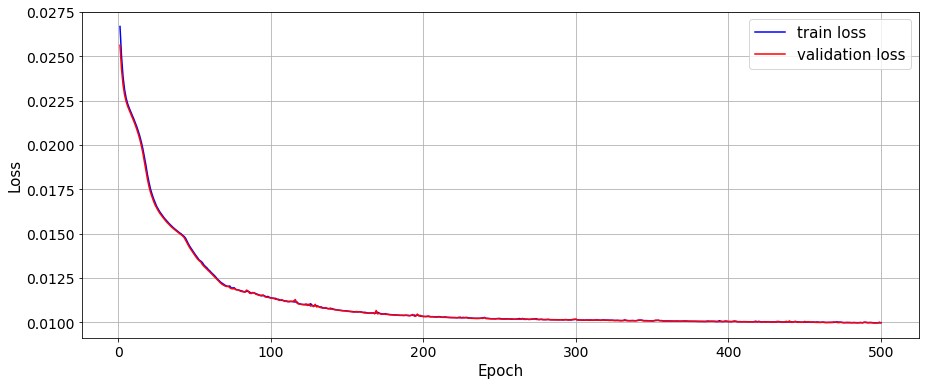

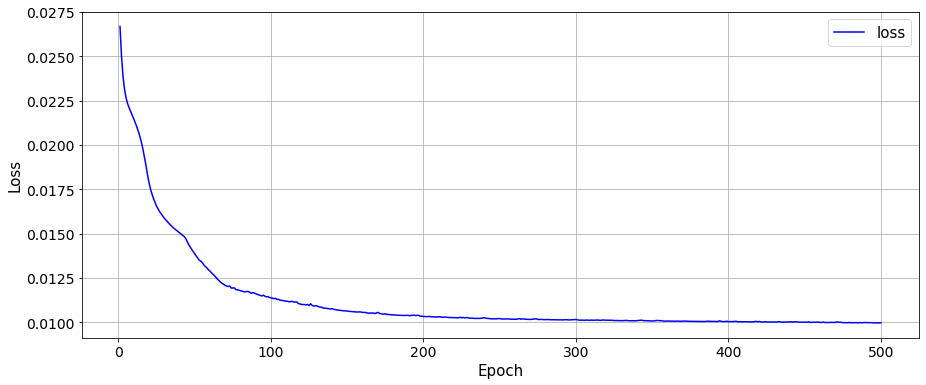

In [111]:
no = 30
epochs=500
rnn_unit_size = 14

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=rnn_unit_size, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_38 (SimpleRNN)   (None, 14)                266       
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 23ms/step - loss: 47.4663 - mse: 47.4663 - mae: 4.1957 - val_loss: 40.9977 - val_mse: 40.9977 - val_mae: 3.9038
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 37.1347 - mse: 37.1347 - mae: 3.7211 - val_loss: 32.4855 - val_mse: 32.4855 - val_mae: 3.4942
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 29.7605 - mse: 29.7605 - mae: 3.3532 - val_loss: 26.5022 - val_mse: 26.5022 - val_mae: 3.1789
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 24.5903 

10/10 [==============================] - 0s 7ms/step - loss: 2.6674 - mse: 2.6674 - mae: 1.0378 - val_loss: 2.6223 - val_mse: 2.6223 - val_mae: 1.0313
Epoch 48/500
10/10 [==============================] - 0s 7ms/step - loss: 2.5894 - mse: 2.5894 - mae: 1.0256 - val_loss: 2.5450 - val_mse: 2.5450 - val_mae: 1.0178
Epoch 49/500
10/10 [==============================] - 0s 6ms/step - loss: 2.5124 - mse: 2.5124 - mae: 1.0119 - val_loss: 2.4686 - val_mse: 2.4686 - val_mae: 1.0035
Epoch 50/500
10/10 [==============================] - 0s 6ms/step - loss: 2.4359 - mse: 2.4359 - mae: 0.9966 - val_loss: 2.3906 - val_mse: 2.3906 - val_mae: 0.9868
Epoch 51/500
10/10 [==============================] - 0s 7ms/step - loss: 2.3565 - mse: 2.3565 - mae: 0.9788 - val_loss: 2.3091 - val_mse: 2.3091 - val_mae: 0.9667
Epoch 52/500
10/10 [==============================] - 0s 7ms/step - loss: 2.2714 - mse: 2.2714 - mae: 0.9562 - val_loss: 2.2197 - val_mse: 2.2197 - val_mae: 0.9410
Epoch 53/500
10/10 [=========

10/10 [==============================] - 0s 6ms/step - loss: 0.3532 - mse: 0.3532 - mae: 0.3393 - val_loss: 0.3436 - val_mse: 0.3436 - val_mae: 0.3343
Epoch 98/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3369 - mse: 0.3369 - mae: 0.3307 - val_loss: 0.3281 - val_mse: 0.3281 - val_mae: 0.3258
Epoch 99/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3219 - mse: 0.3219 - mae: 0.3225 - val_loss: 0.3138 - val_mse: 0.3138 - val_mae: 0.3180
Epoch 100/500
10/10 [==============================] - 0s 7ms/step - loss: 0.3080 - mse: 0.3080 - mae: 0.3147 - val_loss: 0.3001 - val_mse: 0.3001 - val_mae: 0.3102
Epoch 101/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2947 - mse: 0.2947 - mae: 0.3071 - val_loss: 0.2875 - val_mse: 0.2875 - val_mae: 0.3028
Epoch 102/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2825 - mse: 0.2825 - mae: 0.2998 - val_loss: 0.2758 - val_mse: 0.2758 - val_mae: 0.2956
Epoch 103/500
10/10 [=====

Epoch 147/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0815 - mse: 0.0815 - mae: 0.1415 - val_loss: 0.0809 - val_mse: 0.0809 - val_mae: 0.1409
Epoch 148/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0804 - mse: 0.0804 - mae: 0.1404 - val_loss: 0.0797 - val_mse: 0.0797 - val_mae: 0.1398
Epoch 149/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0793 - mse: 0.0793 - mae: 0.1394 - val_loss: 0.0786 - val_mse: 0.0786 - val_mae: 0.1388
Epoch 150/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0783 - mse: 0.0783 - mae: 0.1384 - val_loss: 0.0775 - val_mse: 0.0775 - val_mae: 0.1378
Epoch 151/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0771 - mse: 0.0771 - mae: 0.1374 - val_loss: 0.0764 - val_mse: 0.0764 - val_mae: 0.1369
Epoch 152/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0759 - mse: 0.0759 - mae: 0.1365 - val_loss: 0.0753 - val_mse: 0.0753 - val_mae: 0.1359
Epoch 153/

Epoch 197/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0453 - mse: 0.0453 - mae: 0.1154 - val_loss: 0.0452 - val_mse: 0.0452 - val_mae: 0.1153
Epoch 198/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0451 - mse: 0.0451 - mae: 0.1152 - val_loss: 0.0450 - val_mse: 0.0450 - val_mae: 0.1151
Epoch 199/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0450 - mse: 0.0450 - mae: 0.1150 - val_loss: 0.0449 - val_mse: 0.0449 - val_mae: 0.1149
Epoch 200/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0448 - mse: 0.0448 - mae: 0.1149 - val_loss: 0.0447 - val_mse: 0.0447 - val_mae: 0.1148
Epoch 201/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0447 - mse: 0.0447 - mae: 0.1147 - val_loss: 0.0446 - val_mse: 0.0446 - val_mae: 0.1146
Epoch 202/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0445 - mse: 0.0445 - mae: 0.1146 - val_loss: 0.0444 - val_mse: 0.0444 - val_mae: 0.1145
Epoch 203/

Epoch 247/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0405 - mse: 0.0405 - mae: 0.1106 - val_loss: 0.0405 - val_mse: 0.0405 - val_mae: 0.1106
Epoch 248/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0405 - mse: 0.0405 - mae: 0.1106 - val_loss: 0.0405 - val_mse: 0.0405 - val_mae: 0.1105
Epoch 249/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0404 - mse: 0.0404 - mae: 0.1105 - val_loss: 0.0404 - val_mse: 0.0404 - val_mae: 0.1105
Epoch 250/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0404 - mse: 0.0404 - mae: 0.1105 - val_loss: 0.0403 - val_mse: 0.0403 - val_mae: 0.1104
Epoch 251/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0403 - mse: 0.0403 - mae: 0.1104 - val_loss: 0.0403 - val_mse: 0.0403 - val_mae: 0.1104
Epoch 252/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0403 - mse: 0.0403 - mae: 0.1104 - val_loss: 0.0402 - val_mse: 0.0402 - val_mae: 0.1103
Epoch 253/

Epoch 297/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0381 - mse: 0.0381 - mae: 0.1085 - val_loss: 0.0381 - val_mse: 0.0381 - val_mae: 0.1084
Epoch 298/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0381 - mse: 0.0381 - mae: 0.1084 - val_loss: 0.0381 - val_mse: 0.0381 - val_mae: 0.1084
Epoch 299/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0381 - mse: 0.0381 - mae: 0.1084 - val_loss: 0.0380 - val_mse: 0.0380 - val_mae: 0.1084
Epoch 300/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0380 - mse: 0.0380 - mae: 0.1084 - val_loss: 0.0380 - val_mse: 0.0380 - val_mae: 0.1084
Epoch 301/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0380 - mse: 0.0380 - mae: 0.1083 - val_loss: 0.0380 - val_mse: 0.0380 - val_mae: 0.1083
Epoch 302/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0380 - mse: 0.0380 - mae: 0.1083 - val_loss: 0.0379 - val_mse: 0.0379 - val_mae: 0.1083
Epoch 303/

Epoch 347/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0368 - mse: 0.0368 - mae: 0.1073 - val_loss: 0.0368 - val_mse: 0.0368 - val_mae: 0.1073
Epoch 348/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0368 - mse: 0.0368 - mae: 0.1073 - val_loss: 0.0368 - val_mse: 0.0368 - val_mae: 0.1072
Epoch 349/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0367 - mse: 0.0367 - mae: 0.1072 - val_loss: 0.0367 - val_mse: 0.0367 - val_mae: 0.1072
Epoch 350/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0367 - mse: 0.0367 - mae: 0.1072 - val_loss: 0.0367 - val_mse: 0.0367 - val_mae: 0.1072
Epoch 351/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0367 - mse: 0.0367 - mae: 0.1072 - val_loss: 0.0367 - val_mse: 0.0367 - val_mae: 0.1072
Epoch 352/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0367 - mse: 0.0367 - mae: 0.1072 - val_loss: 0.0367 - val_mse: 0.0367 - val_mae: 0.1072
Epoch 353/

Epoch 397/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0360 - mse: 0.0360 - mae: 0.1066 - val_loss: 0.0360 - val_mse: 0.0360 - val_mae: 0.1066
Epoch 398/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0360 - mse: 0.0360 - mae: 0.1065 - val_loss: 0.0360 - val_mse: 0.0360 - val_mae: 0.1065
Epoch 399/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0360 - mse: 0.0360 - mae: 0.1065 - val_loss: 0.0360 - val_mse: 0.0360 - val_mae: 0.1065
Epoch 400/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0360 - mse: 0.0360 - mae: 0.1065 - val_loss: 0.0360 - val_mse: 0.0360 - val_mae: 0.1065
Epoch 401/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0360 - mse: 0.0360 - mae: 0.1065 - val_loss: 0.0360 - val_mse: 0.0360 - val_mae: 0.1065
Epoch 402/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0360 - mse: 0.0360 - mae: 0.1065 - val_loss: 0.0359 - val_mse: 0.0359 - val_mae: 0.1065
Epoch 403/

Epoch 447/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0355 - mse: 0.0355 - mae: 0.1060 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1060
Epoch 448/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0355 - mse: 0.0355 - mae: 0.1060 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1060
Epoch 449/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0355 - mse: 0.0355 - mae: 0.1060 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1060
Epoch 450/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0355 - mse: 0.0355 - mae: 0.1060 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1059
Epoch 451/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0355 - mse: 0.0355 - mae: 0.1059 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1059
Epoch 452/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0355 - mse: 0.0355 - mae: 0.1059 - val_loss: 0.0354 - val_mse: 0.0354 - val_mae: 0.1059
Epoch 453/

Epoch 497/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0351 - mse: 0.0351 - mae: 0.1056 - val_loss: 0.0351 - val_mse: 0.0351 - val_mae: 0.1056
Epoch 498/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0351 - mse: 0.0351 - mae: 0.1056 - val_loss: 0.0351 - val_mse: 0.0351 - val_mae: 0.1056
Epoch 499/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0351 - mse: 0.0351 - mae: 0.1056 - val_loss: 0.0351 - val_mse: 0.0351 - val_mae: 0.1056
Epoch 500/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0351 - mse: 0.0351 - mae: 0.1056 - val_loss: 0.0351 - val_mse: 0.0351 - val_mae: 0.1056
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_38 (SimpleRNN)   (None, 14)                266       
                                                                 
Total params: 266
Trainable params: 266
Non-trainable

<function matplotlib.pyplot.show(close=None, block=None)>

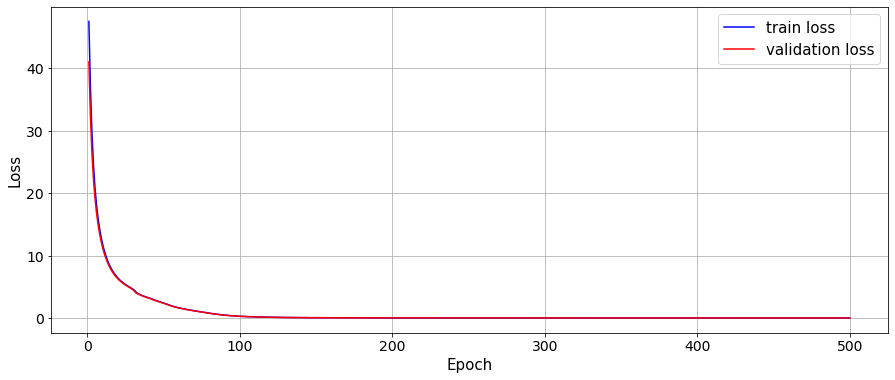

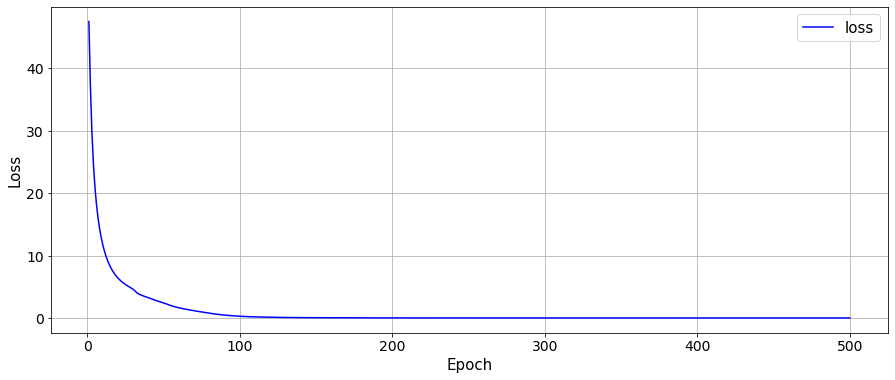

In [112]:
no = 31
epochs=500
rnn_unit_size = 14

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=rnn_unit_size, input_shape=(rnn_unit_size, 4), activation='relu'))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_39 (SimpleRNN)   (None, 14)                266       
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 32ms/step - loss: 0.0376 - mse: 0.0376 - mae: 0.1270 - val_loss: 0.0373 - val_mse: 0.0373 - val_mae: 0.1267
Epoch 2/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0371 - mse: 0.0371 - mae: 0.1265 - val_loss: 0.0368 - val_mse: 0.0368 - val_mae: 0.1262
Epoch 3/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0366 - mse: 0.0366 - mae: 0.1260 - val_loss: 0.0363 - val_mse: 0.0363 - val_mae: 0.1257
Epoch 4/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0361 - mse: 0.0361

10/10 [==============================] - 0s 9ms/step - loss: 0.0274 - mse: 0.0274 - mae: 0.1123 - val_loss: 0.0273 - val_mse: 0.0273 - val_mae: 0.1122
Epoch 48/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0272 - mse: 0.0272 - mae: 0.1120 - val_loss: 0.0272 - val_mse: 0.0272 - val_mae: 0.1119
Epoch 49/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0271 - mse: 0.0271 - mae: 0.1117 - val_loss: 0.0270 - val_mse: 0.0270 - val_mae: 0.1116
Epoch 50/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0270 - mse: 0.0270 - mae: 0.1115 - val_loss: 0.0269 - val_mse: 0.0269 - val_mae: 0.1113
Epoch 51/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0269 - mse: 0.0269 - mae: 0.1112 - val_loss: 0.0268 - val_mse: 0.0268 - val_mae: 0.1110
Epoch 52/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0267 - mse: 0.0267 - mae: 0.1109 - val_loss: 0.0267 - val_mse: 0.0267 - val_mae: 0.1108
Epoch 53/500
10/10 [=====

Epoch 97/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.1073 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1073
Epoch 98/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.1073 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1073
Epoch 99/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.1072 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1072
Epoch 100/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.1072 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1072
Epoch 101/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.1072 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1072
Epoch 102/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.1072 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1072
Epoch 10

10/10 [==============================] - 0s 9ms/step - loss: 0.0248 - mse: 0.0248 - mae: 0.1064 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1064
Epoch 147/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0248 - mse: 0.0248 - mae: 0.1064 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1064
Epoch 148/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0248 - mse: 0.0248 - mae: 0.1064 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1064
Epoch 149/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0248 - mse: 0.0248 - mae: 0.1064 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1064
Epoch 150/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0248 - mse: 0.0248 - mae: 0.1064 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1063
Epoch 151/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0248 - mse: 0.0248 - mae: 0.1063 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1063
Epoch 152/500
10/10 [==

Epoch 196/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1056 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.1056
Epoch 197/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1056 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.1056
Epoch 198/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1056 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.1056
Epoch 199/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1056 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.1056
Epoch 200/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1056 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.1056
Epoch 201/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1056 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.1056
Epoch 202/

Epoch 246/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.1049 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1049
Epoch 247/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.1049 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1049
Epoch 248/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.1049 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1049
Epoch 249/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.1049 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1048
Epoch 250/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.1048 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1048
Epoch 251/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.1048 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1048
Epoch 252/

10/10 [==============================] - 0s 10ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1042 - val_loss: 0.0242 - val_mse: 0.0242 - val_mae: 0.1042
Epoch 296/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1042 - val_loss: 0.0242 - val_mse: 0.0242 - val_mae: 0.1041
Epoch 297/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1041 - val_loss: 0.0242 - val_mse: 0.0242 - val_mae: 0.1041
Epoch 298/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1041 - val_loss: 0.0242 - val_mse: 0.0242 - val_mae: 0.1041
Epoch 299/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1041 - val_loss: 0.0242 - val_mse: 0.0242 - val_mae: 0.1041
Epoch 300/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1041 - val_loss: 0.0242 - val_mse: 0.0242 - val_mae: 0.1041
Epoch 301/500
10/10 [=

Epoch 345/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1035 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1034
Epoch 346/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1034 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1034
Epoch 347/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1034 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1034
Epoch 348/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1034 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1034
Epoch 349/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1034 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1034
Epoch 350/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1034 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1034
Epoch 351/

Epoch 395/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1028 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1028
Epoch 396/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1028 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1027
Epoch 397/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1027 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1027
Epoch 398/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1027 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1027
Epoch 399/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1027 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1027
Epoch 400/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1027 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1027
Epoch 401/

Epoch 445/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1021 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.1021
Epoch 446/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1021 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.1021
Epoch 447/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1021 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.1021
Epoch 448/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1021 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.1021
Epoch 449/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1020 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.1020
Epoch 450/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1020 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.1020
Epoch 451/

Epoch 495/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1015 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.1015
Epoch 496/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1015 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.1014
Epoch 497/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1014 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.1014
Epoch 498/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1014 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.1014
Epoch 499/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1014 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.1014
Epoch 500/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1014 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.1014
Model: "se

<function matplotlib.pyplot.show(close=None, block=None)>

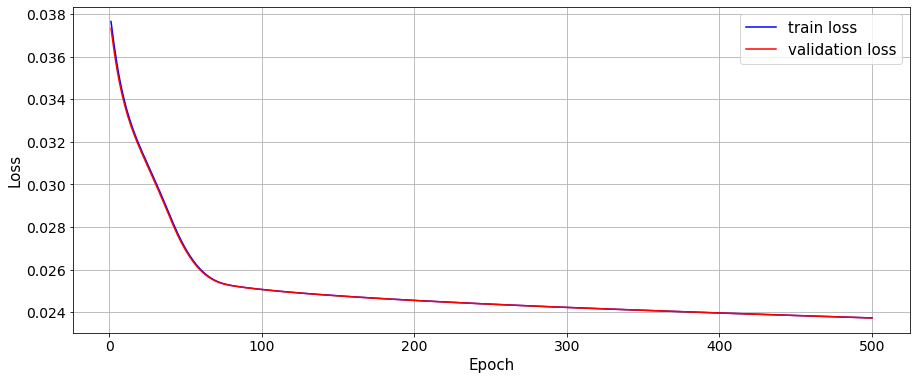

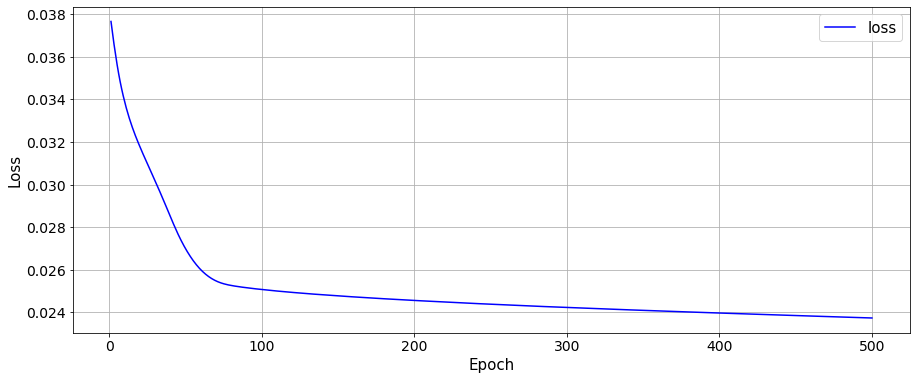

In [113]:
no = 32
epochs=500
rnn_unit_size = 14

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=rnn_unit_size, input_shape=(rnn_unit_size, 4), activation='softmax'))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_40 (SimpleRNN)   (None, 14)                266       
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 24ms/step - loss: 0.3840 - mse: 0.3840 - mae: 0.5060 - val_loss: 0.3809 - val_mse: 0.3809 - val_mae: 0.5028
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3787 - mse: 0.3787 - mae: 0.5005 - val_loss: 0.3757 - val_mse: 0.3757 - val_mae: 0.4974
Epoch 3/500
10/10 [==============================] - 0s 7ms/step - loss: 0.3735 - mse: 0.3735 - mae: 0.4951 - val_loss: 0.3706 - val_mse: 0.3706 - val_mae: 0.4921
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 0.3685 - mse: 0.3685

Epoch 48/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0962 - mse: 0.0962 - mae: 0.2590 - val_loss: 0.0941 - val_mse: 0.0941 - val_mae: 0.2565
Epoch 49/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0927 - mse: 0.0927 - mae: 0.2548 - val_loss: 0.0908 - val_mse: 0.0908 - val_mae: 0.2524
Epoch 50/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0894 - mse: 0.0894 - mae: 0.2507 - val_loss: 0.0876 - val_mse: 0.0876 - val_mae: 0.2485
Epoch 51/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0863 - mse: 0.0863 - mae: 0.2468 - val_loss: 0.0847 - val_mse: 0.0847 - val_mae: 0.2446
Epoch 52/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2430 - val_loss: 0.0819 - val_mse: 0.0819 - val_mae: 0.2409
Epoch 53/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0808 - mse: 0.0808 - mae: 0.2394 - val_loss: 0.0793 - val_mse: 0.0793 - val_mae: 0.2374
Epoch 54/500
10/

Epoch 98/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0345 - mse: 0.0345 - mae: 0.1569 - val_loss: 0.0343 - val_mse: 0.0343 - val_mae: 0.1564
Epoch 99/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0341 - mse: 0.0341 - mae: 0.1560 - val_loss: 0.0339 - val_mse: 0.0339 - val_mae: 0.1555
Epoch 100/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0338 - mse: 0.0338 - mae: 0.1552 - val_loss: 0.0336 - val_mse: 0.0336 - val_mae: 0.1547
Epoch 101/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0335 - mse: 0.0335 - mae: 0.1543 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.1538
Epoch 102/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0332 - mse: 0.0332 - mae: 0.1534 - val_loss: 0.0330 - val_mse: 0.0330 - val_mae: 0.1530
Epoch 103/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0329 - mse: 0.0329 - mae: 0.1526 - val_loss: 0.0327 - val_mse: 0.0327 - val_mae: 0.1522
Epoch 104/50

Epoch 148/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0254 - mse: 0.0254 - mae: 0.1283 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.1281
Epoch 149/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0253 - mse: 0.0253 - mae: 0.1280 - val_loss: 0.0252 - val_mse: 0.0252 - val_mae: 0.1278
Epoch 150/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0252 - mse: 0.0252 - mae: 0.1276 - val_loss: 0.0252 - val_mse: 0.0252 - val_mae: 0.1274
Epoch 151/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.1273 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1271
Epoch 152/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.1270 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.1268
Epoch 153/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0250 - mse: 0.0250 - mae: 0.1267 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.1265
Epoch 154/

Epoch 198/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0228 - mse: 0.0228 - mae: 0.1163 - val_loss: 0.0228 - val_mse: 0.0228 - val_mae: 0.1162
Epoch 199/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0228 - mse: 0.0228 - mae: 0.1162 - val_loss: 0.0228 - val_mse: 0.0228 - val_mae: 0.1161
Epoch 200/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0228 - mse: 0.0228 - mae: 0.1160 - val_loss: 0.0228 - val_mse: 0.0228 - val_mae: 0.1159
Epoch 201/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0227 - mse: 0.0227 - mae: 0.1158 - val_loss: 0.0227 - val_mse: 0.0227 - val_mae: 0.1157
Epoch 202/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0227 - mse: 0.0227 - mae: 0.1157 - val_loss: 0.0227 - val_mse: 0.0227 - val_mae: 0.1156
Epoch 203/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0227 - mse: 0.0227 - mae: 0.1155 - val_loss: 0.0227 - val_mse: 0.0227 - val_mae: 0.1154
Epoch 204/

Epoch 248/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.1102 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.1101
Epoch 249/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.1101 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.1101
Epoch 250/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.1100 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.1100
Epoch 251/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.1099 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.1099
Epoch 252/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.1099 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.1098
Epoch 253/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.1098 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.1097
Epoch 254/

Epoch 298/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.1066 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1066
Epoch 299/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.1066 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1065
Epoch 300/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.1065 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1065
Epoch 301/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.1065 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1065
Epoch 302/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.1064 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1064
Epoch 303/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.1064 - val_loss: 0.0212 - val_mse: 0.0212 - val_mae: 0.1063
Epoch 304/

Epoch 348/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0209 - mse: 0.0209 - mae: 0.1044 - val_loss: 0.0209 - val_mse: 0.0209 - val_mae: 0.1043
Epoch 349/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0209 - mse: 0.0209 - mae: 0.1043 - val_loss: 0.0209 - val_mse: 0.0209 - val_mae: 0.1043
Epoch 350/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0209 - mse: 0.0209 - mae: 0.1043 - val_loss: 0.0209 - val_mse: 0.0209 - val_mae: 0.1043
Epoch 351/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0208 - mse: 0.0208 - mae: 0.1042 - val_loss: 0.0208 - val_mse: 0.0208 - val_mae: 0.1042
Epoch 352/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0208 - mse: 0.0208 - mae: 0.1042 - val_loss: 0.0208 - val_mse: 0.0208 - val_mae: 0.1042
Epoch 353/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0208 - mse: 0.0208 - mae: 0.1042 - val_loss: 0.0208 - val_mse: 0.0208 - val_mae: 0.1041
Epoch 354/

Epoch 398/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0204 - mse: 0.0204 - mae: 0.1027 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1027
Epoch 399/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0204 - mse: 0.0204 - mae: 0.1027 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1026
Epoch 400/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0204 - mse: 0.0204 - mae: 0.1026 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1026
Epoch 401/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - mae: 0.1026 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1026
Epoch 402/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0204 - mse: 0.0204 - mae: 0.1026 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1026
Epoch 403/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0204 - mse: 0.0204 - mae: 0.1026 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1025
Epoch 404/

Epoch 448/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0199 - mse: 0.0199 - mae: 0.1013 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1013
Epoch 449/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0199 - mse: 0.0199 - mae: 0.1013 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1012
Epoch 450/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0199 - mse: 0.0199 - mae: 0.1012 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1012
Epoch 451/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0199 - mse: 0.0199 - mae: 0.1012 - val_loss: 0.0198 - val_mse: 0.0198 - val_mae: 0.1012
Epoch 452/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1012 - val_loss: 0.0198 - val_mse: 0.0198 - val_mae: 0.1012
Epoch 453/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1011 - val_loss: 0.0198 - val_mse: 0.0198 - val_mae: 0.1011
Epoch 454/

Epoch 498/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0192 - mse: 0.0192 - mae: 0.0997 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.0997
Epoch 499/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0192 - mse: 0.0192 - mae: 0.0997 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.0997
Epoch 500/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0192 - mse: 0.0192 - mae: 0.0997 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.0997
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_40 (SimpleRNN)   (None, 14)                266       
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 0s 2ms/step
Result
output_DS2_tR500_33.csv
0.0895

<function matplotlib.pyplot.show(close=None, block=None)>

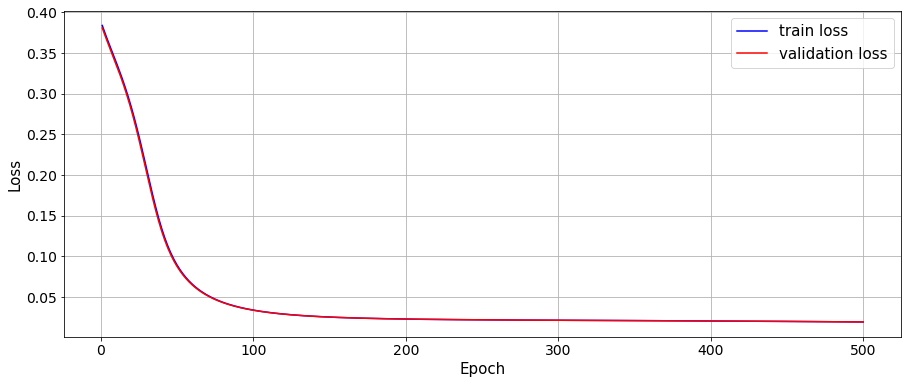

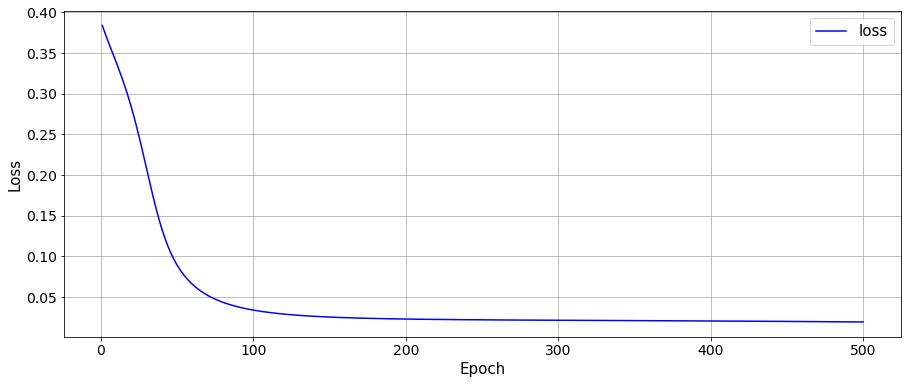

In [114]:
no = 33
epochs=500
rnn_unit_size = 14

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=rnn_unit_size, input_shape=(rnn_unit_size, 4), activation='sigmoid'))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_41 (SimpleRNN)   (None, 14)                266       
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 23ms/step - loss: 0.7370 - mse: 0.7370 - mae: 0.8199 - val_loss: 0.7239 - val_mse: 0.7239 - val_mae: 0.8106
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.7139 - mse: 0.7139 - mae: 0.8033 - val_loss: 0.7001 - val_mse: 0.7001 - val_mae: 0.7933
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6895 - mse: 0.6895 - mae: 0.7853 - val_loss: 0.6750 - val_mse: 0.6750 - val_mae: 0.7742
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6640 - mse: 0.6640

Epoch 48/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1061 - mse: 0.1061 - mae: 0.2445 - val_loss: 0.1043 - val_mse: 0.1043 - val_mae: 0.2424
Epoch 49/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1029 - mse: 0.1029 - mae: 0.2409 - val_loss: 0.1011 - val_mse: 0.1011 - val_mae: 0.2387
Epoch 50/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0998 - mse: 0.0998 - mae: 0.2372 - val_loss: 0.0981 - val_mse: 0.0981 - val_mae: 0.2350
Epoch 51/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0968 - mse: 0.0968 - mae: 0.2335 - val_loss: 0.0951 - val_mse: 0.0951 - val_mae: 0.2315
Epoch 52/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0939 - mse: 0.0939 - mae: 0.2303 - val_loss: 0.0923 - val_mse: 0.0923 - val_mae: 0.2283
Epoch 53/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0911 - mse: 0.0911 - mae: 0.2267 - val_loss: 0.0895 - val_mse: 0.0895 - val_mae: 0.2248
Epoch 54/500
10/

Epoch 98/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.1337 - val_loss: 0.0327 - val_mse: 0.0327 - val_mae: 0.1332
Epoch 99/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0326 - mse: 0.0326 - mae: 0.1327 - val_loss: 0.0323 - val_mse: 0.0323 - val_mae: 0.1321
Epoch 100/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0321 - mse: 0.0321 - mae: 0.1317 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae: 0.1316
Epoch 101/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0318 - mse: 0.0318 - mae: 0.1309 - val_loss: 0.0315 - val_mse: 0.0315 - val_mae: 0.1308
Epoch 102/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0314 - mse: 0.0314 - mae: 0.1300 - val_loss: 0.0311 - val_mse: 0.0311 - val_mae: 0.1293
Epoch 103/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0310 - mse: 0.0310 - mae: 0.1293 - val_loss: 0.0308 - val_mse: 0.0308 - val_mae: 0.1281
Epoch 104/5

Epoch 148/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0204 - mse: 0.0204 - mae: 0.1015 - val_loss: 0.0203 - val_mse: 0.0203 - val_mae: 0.1012
Epoch 149/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0202 - mse: 0.0202 - mae: 0.1012 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.1008
Epoch 150/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1008 - val_loss: 0.0200 - val_mse: 0.0200 - val_mae: 0.1007
Epoch 151/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0200 - mse: 0.0200 - mae: 0.1006 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.1006
Epoch 152/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0199 - mse: 0.0199 - mae: 0.1002 - val_loss: 0.0200 - val_mse: 0.0200 - val_mae: 0.0998
Epoch 153/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0198 - mse: 0.0198 - mae: 0.0998 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.1002
Epoch 154/

Epoch 198/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.0887 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.0881
Epoch 199/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.0881 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0879
Epoch 200/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0155 - mse: 0.0155 - mae: 0.0880 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0878
Epoch 201/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0155 - mse: 0.0155 - mae: 0.0880 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0880
Epoch 202/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0154 - mse: 0.0154 - mae: 0.0876 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0874
Epoch 203/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - mae: 0.0875 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0879
Epoch 204/

Epoch 248/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0808 - val_loss: 0.0134 - val_mse: 0.0134 - val_mae: 0.0817
Epoch 249/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0808 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0806
Epoch 250/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0812 - val_loss: 0.0135 - val_mse: 0.0135 - val_mae: 0.0814
Epoch 251/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0814 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0802
Epoch 252/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0805 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0804
Epoch 253/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0132 - mse: 0.0132 - mae: 0.0802 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0801
Epoch 254/

Epoch 298/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0766 - val_loss: 0.0120 - val_mse: 0.0120 - val_mae: 0.0759
Epoch 299/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0767 - val_loss: 0.0121 - val_mse: 0.0121 - val_mae: 0.0763
Epoch 300/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0122 - mse: 0.0122 - mae: 0.0769 - val_loss: 0.0121 - val_mse: 0.0121 - val_mae: 0.0759
Epoch 301/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0120 - mse: 0.0120 - mae: 0.0757 - val_loss: 0.0120 - val_mse: 0.0120 - val_mae: 0.0755
Epoch 302/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0119 - mse: 0.0119 - mae: 0.0758 - val_loss: 0.0119 - val_mse: 0.0119 - val_mae: 0.0759
Epoch 303/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0119 - mse: 0.0119 - mae: 0.0759 - val_loss: 0.0119 - val_mse: 0.0119 - val_mae: 0.0758
Epoch 304/

Epoch 348/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0730 - val_loss: 0.0110 - val_mse: 0.0110 - val_mae: 0.0726
Epoch 349/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0731 - val_loss: 0.0111 - val_mse: 0.0111 - val_mae: 0.0725
Epoch 350/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0732 - val_loss: 0.0110 - val_mse: 0.0110 - val_mae: 0.0731
Epoch 351/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0731 - val_loss: 0.0110 - val_mse: 0.0110 - val_mae: 0.0722
Epoch 352/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0727 - val_loss: 0.0111 - val_mse: 0.0111 - val_mae: 0.0726
Epoch 353/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0735 - val_loss: 0.0110 - val_mse: 0.0110 - val_mae: 0.0721
Epoch 354/

Epoch 398/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0701 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0692
Epoch 399/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0694 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0699
Epoch 400/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0702 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0694
Epoch 401/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0694 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0692
Epoch 402/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0692 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0690
Epoch 403/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0691 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0688
Epoch 404/

Epoch 448/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0674 - val_loss: 0.0093 - val_mse: 0.0093 - val_mae: 0.0665
Epoch 449/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0669 - val_loss: 0.0093 - val_mse: 0.0093 - val_mae: 0.0663
Epoch 450/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0669 - val_loss: 0.0093 - val_mse: 0.0093 - val_mae: 0.0671
Epoch 451/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0666 - val_loss: 0.0092 - val_mse: 0.0092 - val_mae: 0.0664
Epoch 452/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0668 - val_loss: 0.0094 - val_mse: 0.0094 - val_mae: 0.0667
Epoch 453/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0666 - val_loss: 0.0092 - val_mse: 0.0092 - val_mae: 0.0664
Epoch 454/

Epoch 498/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0648 - val_loss: 0.0087 - val_mse: 0.0087 - val_mae: 0.0642
Epoch 499/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0090 - mse: 0.0090 - mae: 0.0664 - val_loss: 0.0088 - val_mse: 0.0088 - val_mae: 0.0648
Epoch 500/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0649 - val_loss: 0.0089 - val_mse: 0.0089 - val_mae: 0.0664
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_41 (SimpleRNN)   (None, 14)                266       
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 0s 1ms/step
Result
output_DS2_tR500_34.csv
0.0174

<function matplotlib.pyplot.show(close=None, block=None)>

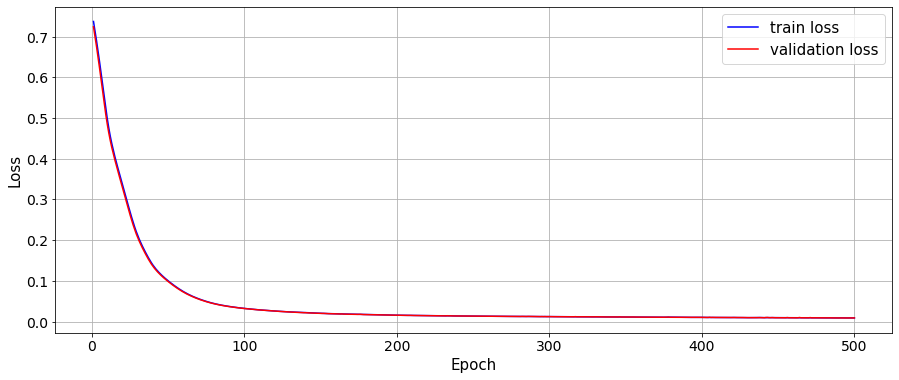

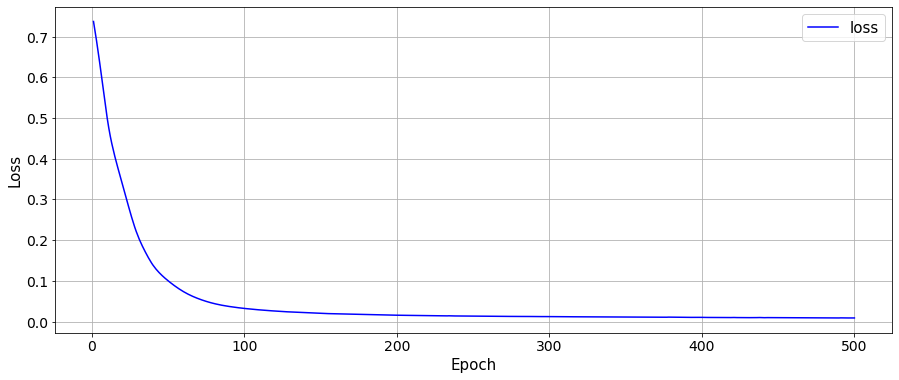

In [115]:
no = 34
epochs=500
rnn_unit_size = 14

data_size = csv_cp.shape[0]
train_cutoff = round(data_size * 0.8)

predict_input = csv_cp[:]

data_input = csv_cp[:, 0:4]
data_output = csv_cp[:, 4]

val_input = csv_cp[:, 0:4]
val_output = csv_cp[:, 4]

new_data_input = []
new_data_output = []
new_val_input = []
new_val_output = []

for i in range(len(data_output) - rnn_unit_size + 1):
    new_data_input.append(data_input[i:i+rnn_unit_size])
    new_data_output.append(data_output[i:i+rnn_unit_size])

for i in range(len(val_output) - rnn_unit_size + 1):
    new_val_input.append(val_input[i:i+rnn_unit_size])
    new_val_output.append(val_output[i:i+rnn_unit_size])

csv_num = len(csv) // rnn_unit_size
remain = len(csv) % rnn_unit_size
if remain != 0:
    csv_num += 1
    csv_in = np.vstack([csv[:, 0:4], np.zeros((rnn_unit_size - remain, 4))])

csv_in = csv_in.reshape(csv_num, rnn_unit_size, 4)
# csv_in = csv_in.reshape(csv_num, 4, 1)

# predict_input = predict_input.reshape(predict_input.shape[0], predict_input.shape[1], 1)

data_input = np.array(new_data_input)
data_output = np.array(new_data_output)
val_input = np.array(new_val_input)
val_output = np.array(new_val_output)

# Train
model = tf.keras.Sequential()
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(rnn_unit_size, 2)))
# model.add(tf.keras.layers.SimpleRNN(units=100, input_shape=(4, 1)))
model.add(tf.keras.layers.SimpleRNN(units=rnn_unit_size, input_shape=(rnn_unit_size, 4)))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mse', metrics=['mse','mae'])
tb_hist = tf.keras.callbacks.TensorBoard(log_dir='log', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
model_history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(val_input, val_output), callbacks = [tb_hist])

# Save Model
with open('model_history_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.json', 'w') as model_history_file:
    train_log = model_history.history
    for i in train_log:
        train_log[i] = [float(data) for data in train_log[i]]
    json.dump(train_log, model_history_file, sort_keys=True, indent=4, separators=(',', ': '))

model.save('model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
del model

model = tf.keras.models.load_model('./model_' + shoes_course + '_tR' + str(tR) + '_' + str(no) + '.h5')
model.summary()
result = model.predict(csv_in)
result = result.flatten()
result = result[:len(csv)]

print("Result")
# print(result)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=6)
print("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv")
np.savetxt("output_" + shoes_course + "_tR" + str(tR) + "_" + str(no) + ".csv", result, delimiter=",")

# outputs = model(x_train_data[:rows+1])
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%o)

y_val_loss = model_history.history['val_loss'] 
y_train_loss = model_history.history['loss']
x_len = np.arange(len(y_train_loss))

print(x_len)
print(y_train_loss)
print(y_val_loss)

print("\n")
# print(model.evaluate(x_val_data, y_val_data))
print("\ntrain loss: ", y_train_loss)
print("\nvalidation loss: ", y_val_loss)
plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='train loss')
plt.plot(x_len+1, y_val_loss, 'r', label='validation loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

plt.figure(figsize=(15, 6))
plt.plot(x_len+1, y_train_loss, 'b', label='loss')

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15oo
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=15)

plt.grid()
plt.show

In [116]:
outputs_array = np.array(result)
for o in outputs_array:
    print("%.6f"%(o if o>0 else temp))
    temp = o if o>0 else temp

0.017464
0.018189
0.018189
0.018189
0.034322
0.029453
0.025165
0.025165
0.025165
0.036261
0.024749
0.118030
0.072349
0.076877
0.083501
0.085408
0.085332
0.062325
0.080196
0.045284
0.048242
0.048242
0.055744
0.009076
0.009076
0.009076
0.009076
0.009076
0.005113
0.015261
0.050687
0.033534
0.048388
0.052217
0.062242
0.011669
0.053270
0.056066
0.053685
0.115726
0.068051
0.048620
0.053906
0.025683
0.054633
0.051432
0.052601
0.052601
0.028241
0.028241
0.028241
0.028241
0.028241
0.028241
0.027103
0.013480
0.051794
0.002990
0.004302
0.004302
0.039543
0.039543
0.001001
0.001001
0.001001
0.047090
0.048423
0.079818
0.086431
0.081931
0.060537
0.033649
0.021085
0.010033
0.046489
0.025355
0.002313
0.011566
0.002413
0.039596
0.047436
0.105359
0.100290
0.129661
0.099294
0.102797
0.069312
0.031644
0.054940
0.035590
0.035590
0.079411
0.079411
0.005398
0.054469
0.089602
0.131480
0.148231
0.149423
0.115374
0.143127
0.135269
0.118751
0.096588
0.109004
0.192029
0.093321
0.109654
0.157199
0.177992
0.202201
0